# Obesity: Super Size To Super Crisis The Obesity Epidemic In The USA

#### Since the onset of technology towards the end of the 20th century an epidemic has slowly been emerging and its obesity. Obesity has been on an upward trend since because our lifestyle has become increasingly sedentary. The ramifications of obesity extend beyond our physical appearance. Obesity has is a multi-faceted issue that is influenced by environmental, behavioral, genetic, socio and economic. Obesity has a profound impact on individuals and communities and there should be proactive measures to combat this crisis that is facing our nation. To understand the complexity of this subject we are going to explore the NHANES dataset.

## Importing and extract data

In [1]:
import pandas as pd
import numpy as np
import warnings
from functools import reduce
warnings.filterwarnings("ignore")
# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

## URL that connected to base URL to access public health datasets from different years

In [2]:
# Years defines the years and with its suffix. These are used to build URL's for diffeerent datasets
years = [("1999-2000", ""), ("2001-2002", "_B"), ("2003-2004", "_C"), ("2005-2006", "_D"),
        ("2007-2008", "_E"), ("2009-2010", "_F"), ("2011-2012", "_G"), ("2013-2014", "_H"),
        ("2015-2016", "_I"), ("2017-2018", "_J")]


# conditions list is a identifiers for which columns we are interested in. 
# CHOLESTEROL LDL & TRIGLY which is available from 1999-2004 
# is the preceeding data for missing years in Cholesterol - LDL & Triglycerides
conditions = ["DEMO", 
              "BPX", 
              "BMX", 
              "VID", 
              ("LAB13", "L13", "HDL"), # High Density Lipoprotein - HDL (LAB13:A; L13: B-C; HDL: D-J)
              ("LAB13AM", "L13AM", "TRIGLY"), # Triglycerides and LDL (LAB13AM: A; L13AM: B-C; TRIGLY: D-J)
              ("LAB13", "L13", "TCHOL"), # TOTAL CHOLESTEROL (LAB13:A; L13:B-C; TCHOL: D-J)
              ("LAB18", "L40", "BIOPRO"), # Standard Biochemistry Profile (LAB18: A; L40: B-C; BIOPRO:D-J)
              ("LAB10", "L10", "GHB"), # GLYCOHEMOGLOBIN (LAB10: A; L10: B-C; GHB: D-J)
              ("LAB10AM", "L10AM", "GLU"), # Plasma Fasting Glucose & Insulin (LAB10AM: A; L10AM:B-C; GLU:D-J)
              ("DRXTOT", "DR1TOT"), # Dietary first day (DRXTOT: A-B; DR1TOT:C-J)
              ("DRXTOT", "DR2TOT"), # Dietary second day (DRXTOT: A-B; DR2TOT:C-J)
              "HIQ",                # Health insurance
              "SLQ"               # Sleep disorder (only starts from D)
              ] 

# Takes the list of conditions and generates URLS from the variables 'years'
def get_data(conditions=None):
    base_url = "https://wwwn.cdc.gov/Nchs/Nhanes"
    all_url = []
    for counter, year in enumerate(years):
        yearly_url = []
        for condition in conditions:
            if type(condition) != str and len(condition) == 3 and counter == 0:
                get_url = f"{base_url}/{year[0]}/{condition[0]}{year[1]}.XPT"
            elif (type(condition) != str) and len(condition) == 3 and (1 <= counter <= 2):
                get_url = f"{base_url}/{year[0]}/{condition[1]}{year[1]}.XPT"
            elif (type(condition) != str) and len(condition) == 3 and (counter >= 3):
                get_url = f"{base_url}/{year[0]}/{condition[2]}{year[1]}.XPT"
            elif (type(condition) != str) and len(condition) == 2 and (counter <= 1):
                get_url = f"{base_url}/{year[0]}/{condition[0]}{year[1]}.XPT"
            elif (type(condition) != str) and len(condition) == 2 and (counter > 1):
                get_url = f"{base_url}/{year[0]}/{condition[1]}{year[1]}.XPT"
            else:
                get_url = f"{base_url}/{year[0]}/{condition}{year[1]}.XPT"
            yearly_url.append(get_url)
        all_url.append(yearly_url)
    return all_url

In [3]:

# Gets the data function form conditions to generate all the list of URLS. 
all_data_urls = get_data(conditions)

# these are url's that are invalid
invalid_urls = ['https://wwwn.cdc.gov/Nchs/Nhanes/1999-2000/VID.XPT',
               'https://wwwn.cdc.gov/Nchs/Nhanes/1999-2000/SLQ.XPT',
               'https://wwwn.cdc.gov/Nchs/Nhanes/2001-2002/SLQ_B.XPT',
               'https://wwwn.cdc.gov/Nchs/Nhanes/2003-2004/SLQ_C.XPT']

all_years_df_list = []
for y_url in all_data_urls:
    # read individual data urls for each year into a list
    yearly_df_list = [pd.read_sas(data_url) for data_url in list(set(y_url)) if data_url not in invalid_urls] 
    # use reduce to iteratively merge the dataframes
    yearly_merged_df = reduce(lambda left, right: pd.merge(left, right, on='SEQN'), yearly_df_list)
    # get all yearly mega dataframe 
    all_years_df_list.append(yearly_merged_df)

# # concatenate vertically all years
# result_df = pd.concat(all_years_df_list, axis=0, ignore_index=True)

In [4]:
# concatenate vertically all years
result_df = pd.concat(all_years_df_list, axis=0, ignore_index=True)

# result_df.to_csv("result_df.csv", index=False)

In [5]:
# saving all the dataset...
#result_df.to_csv("result_df2.csv", index= False)

In [6]:
#this checks all the SEQN in in year database form the years from 1999-2018.
# there is aobut 102956 individuals in this database
for df in all_years_df_list:
    print((df['SEQN'].min(), df['SEQN'].max()))

(2.0, 9961.0)
(9966.0, 21004.0)
(21005.0, 31124.0)
(31130.0, 41474.0)
(41479.0, 51623.0)
(51645.0, 62158.0)
(62161.0, 71916.0)
(73559.0, 83727.0)
(83733.0, 93697.0)
(93708.0, 102956.0)


In [7]:
result_df.shape

(31006, 786)

In [8]:
result_df.head()

SEQN     WTSAF2YR_x    WTSAF4YR_x  LBXGLU  LBXGLUSI  LBXCPSI  LBXIN  \
0   2.0   60586.147294  33073.267573    83.7     4.646    0.484   4.55   
1   5.0  234895.205650  98468.806492    99.9     5.550    0.951  13.65   
2   7.0   57661.621988  32935.874064    85.6     4.756    0.546   9.72   
3   8.0   76026.438279  36016.767631    84.2     4.678    0.337   7.63   
4  10.0   60202.416895  28939.522442    89.8     4.989    0.517   6.43   

   LBXINSI  LBXSAL  LBDSALSI  LBXSATSI  LBXSASSI  LBXSAPSI  LBXSBU  LBDSBUSI  \
0    27.30     4.5      45.0      16.0      19.0      62.0    19.0       6.8   
1    81.90     4.5      45.0      28.0      22.0      63.0    16.0       5.7   
2    58.32     4.5      45.0      15.0      19.0      75.0    10.0       3.6   
3    45.78     4.4      44.0      11.0      27.0     568.0    18.0       6.4   
4    38.58     4.2      42.0      20.0      26.0      86.0    13.0       4.6   

   LBXSCA  LBDSCASI  LBXSCH  LBDSCHSI  LBXSC3SI  LBXSGTSI  LBXSGL  LBDSGLSI  \
0     9.3     2.325   203.0      5.25      28.0      20.0    78.0     4.330   
1     9.5     2.375   277.0      7.16      25.0      34.0    95.0     5.273   
2     9.8     2.450   244.0      6.31      24.0      14.0    81.0     4.496   
3     9.7     2.425   157.0      4.06      22.0       8.0    77.0     4.274   
4     9.4     2.350   135.0      3.49      21.0      25.0    87.0     4.829   

   LBXSIR  LBDSIRSI  LBXSLDSI  LBXSPH  LBDSPHSI  LBXSTB  LBDSTBSI  LBXSTP  \
0    63.0     11.28     140.0     3.3     1.066     0.7      12.0     7.2   
1   137.0     24.54     133.0     3.2     1.033     0.5       8.6     7.3   
2    95.0     17.01     179.0     3.6     1.162     0.4       6.8     8.1   
3   114.0     20.42     193.0     5.4     1.744     0.7      12.0     6.8   
4    80.0     14.33     201.0     3.0     0.969     0.4       6.8     7.6   

   LBDSTPSI  LBXSTR  LBDSTRSI  LBXSUA  LBDSUASI  LBXSCR  LBDSCRSI  LBXSNASI  \
0      72.0   115.0     1.298     6.1     362.8     0.7      61.9     144.1   
1      73.0   341.0     3.850     6.8     404.5     0.8      70.7     137.5   
2      81.0    57.0     0.644     4.3     255.8     0.6      53.0     143.2   
3      68.0    29.0     0.327     5.2     309.3     0.3      26.5     136.8   
4      76.0    42.0     0.474     6.0     356.9     0.9      79.6     140.9   

   LBXSKSI  LBXSCLSI  LBXSOSSI  LBXSGB  LBDSGBSI  LBXFSH  LBDFSHSI  LBXLH  \
0     4.06     104.5     288.0     2.7      27.0     NaN       NaN    NaN   
1     4.63      98.9     276.0     2.8      28.0     NaN       NaN    NaN   
2     4.25     101.5     283.0     3.6      36.0   70.81     70.81  50.29   
3     4.37     100.7     274.0     2.4      24.0     NaN       NaN    NaN   
4     4.28     106.3     281.0     3.4      34.0     NaN       NaN    NaN   

   LBDLHSI         WTDRD1       WTDR4YR  DRDDRSTS  DRDEXMER  DRASCST2  \
0      NaN   26899.708892  14921.934292       1.0      72.0       1.0   
1      NaN  127746.359176  58973.611131       1.0      65.0       1.0   
2    50.29   13984.327637   7348.935510       1.0      65.0       1.0   
3      NaN   17873.978202   8431.670204       1.0      19.0       1.0   
4      NaN   27759.583840  13853.779842       1.0      72.0       1.0   

   DRDAINMD  DRDINTMD  DRDDAY  DRALANG  DRARESP  DRDTSODF  DRXTKCAL  DRXTPROT  \
0       1.0       1.0     6.0      1.0      1.0       2.0   2463.00    123.16   
1       1.0       1.0     2.0      1.0      1.0       2.0   2658.14     97.13   
2       1.0       1.0     6.0      1.0      1.0       2.0   2073.56     81.50   
3       1.0       1.0     7.0      1.0      1.0       1.0   6053.58    236.80   
4       1.0       1.0     5.0      1.0      1.0       2.0   3519.63    158.74   

   DRXTCARB  DRXTTFAT  DRXTSFAT  DRXTMFAT  DRXTPFAT  DRXTCHOL  DRXTFIBE  \
0    350.37     71.95     24.34     26.48     11.94    313.95     36.99   
1    253.98    114.52     36.00     60.55     11.35    180.57     17.28   
2    224.95     97.69     32.51     41.07     18.1

result_df['SEQN'].unique().tolist()

In [9]:
#result_df['SEQN'].value_counts().index.tolist()

[2.0,
 66238.0,
 66320.0,
 66317.0,
 66311.0,
 66310.0,
 66309.0,
 66308.0,
 66302.0,
 66300.0,
 66298.0,
 66290.0,
 66289.0,
 66283.0,
 66280.0,
 66279.0,
 66271.0,
 66270.0,
 66268.0,
 66265.0,
 66261.0,
 66259.0,
 66254.0,
 66253.0,
 66249.0,
 66247.0,
 66246.0,
 66243.0,
 66241.0,
 66321.0,
 66323.0,
 66325.0,
 66362.0,
 66399.0,
 66398.0,
 66397.0,
 66396.0,
 66395.0,
 66393.0,
 66391.0,
 66389.0,
 66386.0,
 66384.0,
 66378.0,
 66377.0,
 66355.0,
 66326.0,
 66349.0,
 66347.0,
 66346.0,
 66343.0,
 66342.0,
 66341.0,
 66338.0,
 66335.0,
 66334.0,
 66332.0,
 66331.0,
 66327.0,
 66240.0,
 66237.0,
 65289.0,
 66235.0,
 66126.0,
 66123.0,
 66117.0,
 66114.0,
 66111.0,
 66110.0,
 66109.0,
 66107.0,
 66104.0,
 66103.0,
 66101.0,
 66100.0,
 66098.0,
 66095.0,
 66094.0,
 66093.0,
 66090.0,
 66089.0,
 66087.0,
 66083.0,
 66079.0,
 66076.0,
 66075.0,
 66071.0,
 66068.0,
 66066.0,
 66058.0,
 66131.0,
 66132.0,
 66136.0,
 66202.0,
 66234.0,
 66233.0,
 66230.0,
 66229.0,
 66224.0,
 66222.0,
 662

In [10]:
#result_df[["SDDSRVYR"]]

SDDSRVYR
0           1.0
1           1.0
2           1.0
3           1.0
4           1.0
5           1.0
6           1.0
7           1.0
8           1.0
9           1.0
10          1.0
11          1.0
12          1.0
13          1.0
14          1.0
15          1.0
16          1.0
17          1.0
18          1.0
19          1.0
20          1.0
21          1.0
22          1.0
23          1.0
24          1.0
25          1.0
26          1.0
27          1.0
28          1.0
29          1.0
30          1.0
31          1.0
32          1.0
33          1.0
34          1.0
35          1.0
36          1.0
37          1.0
38          1.0
39          1.0
40          1.0
41          1.0
42          1.0
43          1.0
44          1.0
45          1.0
46          1.0
47          1.0
48          1.0
49          1.0
50          1.0
51          1.0
52          1.0
53          1.0
54          1.0
55          1.0
56          1.0
57          1.0
58          1.0
59          1.0
60          1.0
61          1.0
62          1.0
63          1.0
64          1.0
65          1.0
66          1.0
67          1.0
68          1.0
69          1.0
70          1.0
71          1.0
72          1.0
73          1.0
74          1.0
75          1.0
76          1.0
77          1.0
78          1.0
79          1.0
80          1.0
81          1.0
82          1.0
83          1.0
84          1.0
85          1.0
86          1.0
87          1.0
88          1.0
89          1.0
90          1.0
91          1.0
92          1.0
93          1.0
94          1.0
95          1.0
96          1.0
97          1.0
98          1.0
99          1.0
100         1.0
101         1.0
102         1.0
103         1.0
104         1.0
105         1.0
106         1.0
107         1.0
108         1.0
109         1.0
110         1.0
111         1.0
112         1.0
113         1.0
114         1.0
115         1.0
116         1.0
117         1.0
118         1.0
119         1.0
120         1.0
121         1.0
122         1.0
123         1.0
124         1.0
125         1.0
126         1.0
127         1.0
128         1.0
129         1.0
130         1.0
131         1.0
132         1.0
133         1.0
134         1.0
135         1.0
136         1.0
137         1.0
138         1.0
139         1.0
140         1.0
141         1.0
142         1.0
143         1.0
144         1.0
145         1.0
146         1.0
147         1.0
148         1.0
149         1.0
150         1.0
151         1.0
152         1.0
153         1.0
154         1.0
155         1.0
156         1.0
157         1.0
158         1.0
159         1.0
160         1.0
161         1.0
162         1.0
163         1.0
164         1.0
165         1.0
166         1.0
167         1.0
168         1.0
169         1.0
170         1.0
171         1.0
172         1.0
173         1.0
174         1.0
175         1.0
176         1.0
177         1.0
178         1.0
179         1.0
180         1.0
181         1.0
182         1.0
183         1.0
184         1.0
185         1.0
186         1.0
187         1.0
188         1.0
189         1.0
190         1.0
191         1.0
192         1.0
193         1.0
194         1.0
195         1.0
196         1.0
197         1.0
198         1.0
199         1.0
200         1.0
201         1.0
202         1.0
203         1.0
204         1.0
205         1.0
206         1.0
207         1.0
208         1.0
209         1.0
210         1.0
211         1.0
212         1.0
213         1.0
214         1.0
215         1.0
216         1.0
217         1.0
218         1.0
219         1.0
220         1.0
221         1.0
222         1.0
223         1.0
224         1.0
225         1.0
226         1.0
227         1.0
228         1.0
229         1.0
230         1.0
231         1.0
232         1.0
233         1.0
234         1.0
235         1.0
236         1.0
237         1.0
238         1.0
239         1.0
240         1.0
241         1.0
242         1.0
243         1.0
244         1.0
245         1.0
246         1.0
247         1.0
248         1.0
249    

In [11]:
# checking the missing data
#result_df.isna().sum()

SEQN              0
WTSAF2YR_x        0
WTSAF4YR_x    24073
LBXGLU         1755
LBXGLUSI      24530
LBXCPSI       21505
LBXIN         10386
LBXINSI       24641
LBXSAL         2072
LBDSALSI       2072
LBXSATSI       2101
LBXSASSI       2112
LBXSAPSI       5469
LBXSBU         2076
LBDSBUSI       2076
LBXSCA         2092
LBDSCASI       2092
LBXSCH         2076
LBDSCHSI       2076
LBXSC3SI       2098
LBXSGTSI       2078
LBXSGL         2076
LBDSGLSI       2076
LBXSIR         2090
LBDSIRSI       2090
LBXSLDSI       5537
LBXSPH         5468
LBDSPHSI       2076
LBXSTB         5479
LBDSTBSI       2089
LBXSTP         2088
LBDSTPSI       2088
LBXSTR         2089
LBDSTRSI       2089
LBXSUA         2079
LBDSUASI       2079
LBXSCR         5467
LBDSCRSI       2075
LBXSNASI       2073
LBXSKSI        2077
LBXSCLSI       2074
LBXSOSSI       2078
LBXSGB         2089
LBDSGBSI       2089
LBXFSH        30134
LBDFSHSI      30134
LBXLH         30135
LBDLHSI       30135
WTDRD1        24308
WTDR4YR       24308


In [12]:
col_of_interest = ["SEQN", "SDDSRVYR", "RIAGENDR", "RIDRETH1", "RIDAGEYR", "DMDBORN", "DMDBORN2", "DMDBORN4",
                        "DMDMARTL", "DMDEDUC2", "DMDHHSIZ", "INDHHINC","INDHHIN2", "INDFMINC", "INDFMIN2", "INDFMPIR", 
                        "DMDCITZN",                                                                            # DEMO
                        "BPXSY1", "BPXSY2", "BPXSY3", "BPXDI1", "BPXDI2", "BPXDI3",                            # BPX
                        "BMXWT", "BMXBMI", "BMDBMIC", "BMXHT",                                                 # BMX
                        "LBDVIDMS", "LBXVIDMS", "LBXVD2MS", "LBXVD3MS",                                        # VID
                        "LBDHDL", "LBDHDLSI", "LBXHDD", "LBDHDDSI",                                            # HDL
                        "LBXTR", "LBDTRSI", "LBDLDL","LBDLDLSI",                                               # LDL
                        "LBXTC", "LBDTCSI",                                                                    # CHOL TOTAL
                        "LBXGH",                                                                               # HB
                        "LBXGLU", "LBXGLUSI", "LBXIN","LBXINSI"                                                # Glucose Insulin
                        ] # bio_chem_prof not included

# int_df = result_df[col_of_interest]

In [13]:
result_df.head()

SEQN     WTSAF2YR_x    WTSAF4YR_x  LBXGLU  LBXGLUSI  LBXCPSI  LBXIN  \
0   2.0   60586.147294  33073.267573    83.7     4.646    0.484   4.55   
1   5.0  234895.205650  98468.806492    99.9     5.550    0.951  13.65   
2   7.0   57661.621988  32935.874064    85.6     4.756    0.546   9.72   
3   8.0   76026.438279  36016.767631    84.2     4.678    0.337   7.63   
4  10.0   60202.416895  28939.522442    89.8     4.989    0.517   6.43   

   LBXINSI  LBXSAL  LBDSALSI  LBXSATSI  LBXSASSI  LBXSAPSI  LBXSBU  LBDSBUSI  \
0    27.30     4.5      45.0      16.0      19.0      62.0    19.0       6.8   
1    81.90     4.5      45.0      28.0      22.0      63.0    16.0       5.7   
2    58.32     4.5      45.0      15.0      19.0      75.0    10.0       3.6   
3    45.78     4.4      44.0      11.0      27.0     568.0    18.0       6.4   
4    38.58     4.2      42.0      20.0      26.0      86.0    13.0       4.6   

   LBXSCA  LBDSCASI  LBXSCH  LBDSCHSI  LBXSC3SI  LBXSGTSI  LBXSGL  LBDSGLSI  \
0     9.3     2.325   203.0      5.25      28.0      20.0    78.0     4.330   
1     9.5     2.375   277.0      7.16      25.0      34.0    95.0     5.273   
2     9.8     2.450   244.0      6.31      24.0      14.0    81.0     4.496   
3     9.7     2.425   157.0      4.06      22.0       8.0    77.0     4.274   
4     9.4     2.350   135.0      3.49      21.0      25.0    87.0     4.829   

   LBXSIR  LBDSIRSI  LBXSLDSI  LBXSPH  LBDSPHSI  LBXSTB  LBDSTBSI  LBXSTP  \
0    63.0     11.28     140.0     3.3     1.066     0.7      12.0     7.2   
1   137.0     24.54     133.0     3.2     1.033     0.5       8.6     7.3   
2    95.0     17.01     179.0     3.6     1.162     0.4       6.8     8.1   
3   114.0     20.42     193.0     5.4     1.744     0.7      12.0     6.8   
4    80.0     14.33     201.0     3.0     0.969     0.4       6.8     7.6   

   LBDSTPSI  LBXSTR  LBDSTRSI  LBXSUA  LBDSUASI  LBXSCR  LBDSCRSI  LBXSNASI  \
0      72.0   115.0     1.298     6.1     362.8     0.7      61.9     144.1   
1      73.0   341.0     3.850     6.8     404.5     0.8      70.7     137.5   
2      81.0    57.0     0.644     4.3     255.8     0.6      53.0     143.2   
3      68.0    29.0     0.327     5.2     309.3     0.3      26.5     136.8   
4      76.0    42.0     0.474     6.0     356.9     0.9      79.6     140.9   

   LBXSKSI  LBXSCLSI  LBXSOSSI  LBXSGB  LBDSGBSI  LBXFSH  LBDFSHSI  LBXLH  \
0     4.06     104.5     288.0     2.7      27.0     NaN       NaN    NaN   
1     4.63      98.9     276.0     2.8      28.0     NaN       NaN    NaN   
2     4.25     101.5     283.0     3.6      36.0   70.81     70.81  50.29   
3     4.37     100.7     274.0     2.4      24.0     NaN       NaN    NaN   
4     4.28     106.3     281.0     3.4      34.0     NaN       NaN    NaN   

   LBDLHSI         WTDRD1       WTDR4YR  DRDDRSTS  DRDEXMER  DRASCST2  \
0      NaN   26899.708892  14921.934292       1.0      72.0       1.0   
1      NaN  127746.359176  58973.611131       1.0      65.0       1.0   
2    50.29   13984.327637   7348.935510       1.0      65.0       1.0   
3      NaN   17873.978202   8431.670204       1.0      19.0       1.0   
4      NaN   27759.583840  13853.779842       1.0      72.0       1.0   

   DRDAINMD  DRDINTMD  DRDDAY  DRALANG  DRARESP  DRDTSODF  DRXTKCAL  DRXTPROT  \
0       1.0       1.0     6.0      1.0      1.0       2.0   2463.00    123.16   
1       1.0       1.0     2.0      1.0      1.0       2.0   2658.14     97.13   
2       1.0       1.0     6.0      1.0      1.0       2.0   2073.56     81.50   
3       1.0       1.0     7.0      1.0      1.0       1.0   6053.58    236.80   
4       1.0       1.0     5.0      1.0      1.0       2.0   3519.63    158.74   

   DRXTCARB  DRXTTFAT  DRXTSFAT  DRXTMFAT  DRXTPFAT  DRXTCHOL  DRXTFIBE  \
0    350.37     71.95     24.34     26.48     11.94    313.95     36.99   
1    253.98    114.52     36.00     60.55     11.35    180.57     17.28   
2    224.95     97.69     32.51     41.07     18.1

## Data Cleaning and processing

In [14]:
df.head()

SEQN     WTSAF2YR_x  LBXGLU  LBDGLUSI    SLQ300    SLQ310  SLD012  \
0  93708.0   25653.677102   122.0      6.77  b'22:30'  b'06:30'     8.0   
1  93711.0   29226.045506   107.0      5.94  b'22:00'  b'05:00'     7.0   
2  93717.0  137150.988033    91.0      5.05  b'22:30'  b'06:30'     8.0   
3  93718.0   58883.311935    89.0      4.94  b'21:00'  b'05:00'     8.0   
4  93721.0   17154.986829   104.0      5.77  b'21:00'  b'06:00'     9.0   

     SLQ320    SLQ330  SLD013        SLQ030        SLQ040  SLQ050  \
0  b'22:30'  b'06:30'     8.0  9.000000e+00  5.397605e-79     2.0   
1  b'23:00'  b'08:00'     9.0  2.000000e+00  1.000000e+00     1.0   
2  b'00:00'  b'10:00'    10.0  2.000000e+00  5.397605e-79     1.0   
3  b'22:00'  b'09:00'    11.0  5.397605e-79  5.397605e-79     2.0   
4  b'22:00'  b'07:00'     9.0  5.397605e-79  5.397605e-79     2.0   

         SLQ120      WTDRD1_x       WTDR2D_x  DR1DRSTZ  DR1EXMER  DRABF_x  \
0  2.000000e+00  1.082555e+04   22481.854193       1.0      73.0      2.0   
1  3.000000e+00  9.098493e+03    8229.959540       1.0      86.0      2.0   
2  1.000000e+00  1.058947e+05  107259.312344       1.0      81.0      2.0   
3  2.000000e+00  5.397605e-79            NaN       5.0       NaN      NaN   
4  5.397605e-79  7.874668e+03    6710.608975       1.0      49.0      2.0   

   DRDINT_x  DR1DBIH  DR1DAY  DR1LANG  DR1MRESP  DR1HELP  DBQ095Z  DBD100  \
0       2.0     41.0     7.0      6.0       1.0      9.0      4.0     NaN   
1       2.0     13.0     6.0      1.0       1.0     12.0      1.0     1.0   
2       2.0     19.0     4.0      1.0       1.0     12.0      1.0     2.0   
3       NaN      NaN     NaN      1.0       NaN      NaN      NaN     NaN   
4       2.0     16.0     1.0      2.0       1.0     12.0      4.0     NaN   

   DRQSPREP  DR1STY  DR1SKY  DRQSDIET  DRQSDT1  DRQSDT2  DRQSDT3  DRQSDT4  \
0       4.0     2.0     NaN       2.0      NaN      NaN      NaN      NaN   
1       2.0     2.0     NaN       1.0      NaN      NaN      NaN      4.0   
2       3.0     1.0     1.0       2.0      NaN      NaN      NaN      NaN   
3       NaN     NaN     NaN       NaN      NaN      NaN      NaN      NaN   
4       4.0     2.0     NaN       2.0      NaN      NaN      NaN      NaN   

   DRQSDT5  DRQSDT6  DRQSDT7  DRQSDT8  DRQSDT9  DRQSDT10  DRQSDT11  DRQSDT12  \
0      NaN      NaN      NaN      NaN      NaN       NaN       NaN       NaN   
1      NaN      6.0      NaN      NaN      NaN       NaN       NaN       NaN   
2      NaN      NaN      NaN      NaN      NaN       NaN       NaN       NaN   
3      NaN      NaN      NaN      NaN      NaN       NaN       NaN       NaN   
4      NaN      NaN      NaN      NaN      NaN       NaN       NaN       NaN   

   DRQSDT91  DR1TNUMF  DR1TKCAL  DR1TPROT  DR1TCARB  DR1TSUGR  DR1TFIBE  \
0       NaN      14.0    1251.0     50.96    123.71     49.84      16.6   
1       NaN      27.0    2840.0    101.33    339.60    148.21      44.5   
2       NaN      18.0    3151.0     97.12    345.52    137.01      18.0   
3       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
4       NaN      17.0    1930.0     79.98    226.61    105.06      21.1   

   DR1TTFAT  DR1TSFAT  DR1TMFAT  DR1TPFAT  DR1TCHOL  DR1TATOC      DR1TATOA  \
0     65.49    17.446    29.000    14.823      71.0      6.20  5.397605e-79   
1    124.24    41.268    39.560    31.340     546.0     14.27  5.397605e-79   
2    156.75    47.816    46.774    48.318     384.0     14.20  5.397605e-79   
3       NaN       NaN       NaN       NaN       NaN       NaN           NaN   
4     80.86    26.186    27.881    17.888     608.0      6.77  5.397605e-79   

   DR1TRET  DR1TVARA  DR1TACAR  DR1TBCAR  DR1TCRYP      DR1TLYCO  DR1TLZ  \
0     35.0     236.0     323.0    2245.0      26.0  5.397605e-79  2148.0   
1    691.0    1012.0     414.0    3639.0      31.0  2.307400e+04  5629.0   
2    472.0     886.0     287.0    4736.0     167.0  6.435000e+03  3932.0   
3      NaN       NaN       NaN       NaN

In [15]:
df = result_df.copy()

In [16]:
# df[~(df["INDFMIN2"].isna())] # check if income of were the two arent missing. 
df[~(df["INDFMIN2"].isna()) & ~(df["INDFMINC"].isna())]

Empty DataFrame
Columns: [SEQN, WTSAF2YR_x, WTSAF4YR_x, LBXGLU, LBXGLUSI, LBXCPSI, LBXIN, LBXINSI, LBXSAL, LBDSALSI, LBXSATSI, LBXSASSI, LBXSAPSI, LBXSBU, LBDSBUSI, LBXSCA, LBDSCASI, LBXSCH, LBDSCHSI, LBXSC3SI, LBXSGTSI, LBXSGL, LBDSGLSI, LBXSIR, LBDSIRSI, LBXSLDSI, LBXSPH, LBDSPHSI, LBXSTB, LBDSTBSI, LBXSTP, LBDSTPSI, LBXSTR, LBDSTRSI, LBXSUA, LBDSUASI, LBXSCR, LBDSCRSI, LBXSNASI, LBXSKSI, LBXSCLSI, LBXSOSSI, LBXSGB, LBDSGBSI, LBXFSH, LBDFSHSI, LBXLH, LBDLHSI, WTDRD1, WTDR4YR, DRDDRSTS, DRDEXMER, DRASCST2, DRDAINMD, DRDINTMD, DRDDAY, DRALANG, DRARESP, DRDTSODF, DRXTKCAL, DRXTPROT, DRXTCARB, DRXTTFAT, DRXTSFAT, DRXTMFAT, DRXTPFAT, DRXTCHOL, DRXTFIBE, DRXTVAIU, DRXTVARE, DRXTCARO, DRXTVB1, DRXTVB2, DRXTNIAC, DRXTVB6, DRXTFOLA, DRXTVB12, DRXTVC, DRXTVE, DRXTCALC, DRXTPHOS, DRXTMAGN, DRXTIRON, DRXTZINC, DRXTCOPP, DRDTSODI, DRXTPOTA, DRXTSELE, DRXTCAFF, DRXTTHEO, DRXTALCO, DRXTWATE, DRXTS040, DRXTS060, DRXTS080, DRXTS100, DRXTS120, DRXTS140, DRXTS160, DRXTS180, ...]
Index: []

In [17]:
df[~(df["DMDBORN"].isna()) & ~(df["DMDBORN2"].isna())]

Empty DataFrame
Columns: [SEQN, WTSAF2YR_x, WTSAF4YR_x, LBXGLU, LBXGLUSI, LBXCPSI, LBXIN, LBXINSI, LBXSAL, LBDSALSI, LBXSATSI, LBXSASSI, LBXSAPSI, LBXSBU, LBDSBUSI, LBXSCA, LBDSCASI, LBXSCH, LBDSCHSI, LBXSC3SI, LBXSGTSI, LBXSGL, LBDSGLSI, LBXSIR, LBDSIRSI, LBXSLDSI, LBXSPH, LBDSPHSI, LBXSTB, LBDSTBSI, LBXSTP, LBDSTPSI, LBXSTR, LBDSTRSI, LBXSUA, LBDSUASI, LBXSCR, LBDSCRSI, LBXSNASI, LBXSKSI, LBXSCLSI, LBXSOSSI, LBXSGB, LBDSGBSI, LBXFSH, LBDFSHSI, LBXLH, LBDLHSI, WTDRD1, WTDR4YR, DRDDRSTS, DRDEXMER, DRASCST2, DRDAINMD, DRDINTMD, DRDDAY, DRALANG, DRARESP, DRDTSODF, DRXTKCAL, DRXTPROT, DRXTCARB, DRXTTFAT, DRXTSFAT, DRXTMFAT, DRXTPFAT, DRXTCHOL, DRXTFIBE, DRXTVAIU, DRXTVARE, DRXTCARO, DRXTVB1, DRXTVB2, DRXTNIAC, DRXTVB6, DRXTFOLA, DRXTVB12, DRXTVC, DRXTVE, DRXTCALC, DRXTPHOS, DRXTMAGN, DRXTIRON, DRXTZINC, DRXTCOPP, DRDTSODI, DRXTPOTA, DRXTSELE, DRXTCAFF, DRXTTHEO, DRXTALCO, DRXTWATE, DRXTS040, DRXTS060, DRXTS080, DRXTS100, DRXTS120, DRXTS140, DRXTS160, DRXTS180, ...]
Index: []

In [18]:
#  fill missing values in DMDBORN with corresponding DMDBORN2 or DMDBORN4 value of the same record.
df['DMDBORN'] = df['DMDBORN'].combine_first(df['DMDBORN2']).combine_first(df['DMDBORN4'])
#  fill missing values in INDFMINC with corresponding INDFMIN2 value of the same record.
df['INDFMINC'] = df['INDFMINC'].combine_first(df['INDFMIN2'])
#  fill missing values in INDHHINC with corresponding INDHHIN2 value of the same record.
df['INDHHINC'] = df['INDHHINC'].combine_first(df['INDHHIN2'])


In [19]:
#  fill missing values in LBDHDL with corresponding LBDHDD or LBXHDD value of the same record.
df['LBDHDL'] = df['LBDHDL'].combine_first(df['LBDHDD']).combine_first(df['LBXHDD'])

In [20]:
df[["DMDBORN", "DMDBORN2", "DMDBORN4"]].sample(20)

DMDBORN  DMDBORN2  DMDBORN4
3792       1.0       NaN       NaN
25575      1.0       NaN       1.0
4789       1.0       NaN       NaN
29520      1.0       NaN       1.0
11368      1.0       NaN       NaN
22035      2.0       NaN       2.0
19015      4.0       4.0       NaN
14344      1.0       1.0       NaN
27164      2.0       NaN       2.0
14385      1.0       1.0       NaN
13357      4.0       4.0       NaN
19178      2.0       2.0       NaN
22092      1.0       NaN       1.0
8551       1.0       NaN       NaN
5584       1.0       NaN       NaN
8398       1.0       NaN       NaN
13406      4.0       4.0       NaN
11677      1.0       NaN       NaN
15574      1.0       1.0       NaN
27205      1.0       NaN       1.0

 "DMDBORN", "DMDBORN2", "DMDBORN4", "DMDEDUC2", "INDHHINC","INDHHIN2", "INDFMINC", "INDFMIN2"

In [21]:
decode_SDDSRVYR = {1.0:'1999-2000', 2.0:'2001-2002', 3.0:'2003-2004', 4.0:'2005-2006', 5.0:'2007-2008', 
                    6.0:'2009-2010', 7.0:'2011-2012', 8.0:'2013-2014', 9.0:'2015-2016', 10.0:'2017-2018'}
decode_RIAGENDR = {1.0:'Male', 2.0:'Female'}
decode_RIDRETH1 = {1.0:'Mexican American', 2.0:'Other Hispanic', 3.0:'Non-Hispanic White', 4.0:'Non-Hispanic Black', 
                    5.0:'Other Race - Including Multi-Racial'}
decode_DMDBORN = {1.0:'Born in 50 US States or Washington, DC', 2.0:'Born in Mexico', 3.0:'Born Elsewhere', 
                       7.0:np.nan} # 7 is refused
decode_DMDMARTL = {1.0:'Married', 2.0:'Widowed', 3.0:'Divorced', 4.0:'Separated', 5.0:'Never married', 
                    6.0:'Living with partner', 77.0:np.nan, 99.0:np.nan} # 77.0 is refused, 99.0 is Don't know"
decode_DMDEDUC2 = {7.0:np.nan, 9.0:np.nan} # 7.0 is refused, 9.0 is Don't know"

decode_INDHHINC = {1.0:'0 to  4,999', 2.0:'5,000 to  9,999', 3.0:'10,000 to 14,999', 4.0:'15,000 to 19,999', 
                   5.0:'20,000 to 24,999', 6.0:'25,000 to 34,999', 7.0:'35,000 to 44,999', 8.0:'45,000 to 54,999', 
                   9.0:'55,000 to 64,999', 10.0:'65,000 to 74,999', 11.0:'75,000 and Over', 12.0:'Over 20,000', 
                   13.0:'Under 20,000',14:"75,000 to 99,999", 15:"100,000 and Over", 
                   77.0:np.nan, 99.0:np.nan} # 77.0 is "refused", 99.0 is "Don't know"

decode_INDFMINC = {1.0:' 0 to  4,999', 2.0:' 5,000 to  9,999', 3.0:'10,000 to 14,999', 4.0:'15,000 to 19,999', 
                   5.0:'20,000 to 24,999', 6.0:'25,000 to 34,999', 7.0:'35,000 to 44,999', 8.0:'45,000 to 54,999', 
                   9.0:'55,000 to 64,999', 10.0:'65,000 to 74,999', 11.0:'75,000 and Over', 12.0:'Over 20,000', 
                   13.0:'Under 20,000' ,14:"75,000 to 99,999", 15:"100,000 and Over",
                   77.0:np.nan, 99.0:np.nan} # 77.0 is "refused", 99.0 is "Don't know"

decode_BMDBMIC = {1.0:'Underweight', 2.0:'Normal Weight', 3.0:'OverWeight', 4.0:'Obese'}

decode_DMDCITZN = {1.0:'Citizen by birth or naturalization', 2.0:'Not a citizen of the US', 7.0:np.nan, 9.0:np.nan} # 77.0 is refused, 99.0 is Don't know"


df["SDDSRVYR"] = df["SDDSRVYR"].map(decode_SDDSRVYR)
df["RIAGENDR"] = df["RIAGENDR"].map(decode_RIAGENDR)
df["RIDRETH1"] = df["RIDRETH1"].map(decode_RIDRETH1)
df["DMDBORN"] = df["DMDBORN"].map(decode_DMDBORN)
df["DMDMARTL"] = df["DMDMARTL"].map(decode_DMDMARTL)
df["DMDEDUC2"] = df["DMDEDUC2"].map(decode_DMDEDUC2)
df["INDHHINC"] = df["INDHHINC"].map(decode_INDHHINC)
df["INDFMINC"] = df["INDFMINC"].map(decode_INDFMINC)
df["DMDCITZN"] = df["DMDCITZN"].map(decode_DMDCITZN)
df["BMDBMIC"] = df["BMDBMIC"].map(decode_BMDBMIC)



In [22]:
# df.dropna(inplace=True)

# df.isna().sum()

In [23]:
df[col_of_interest].head()

SEQN   SDDSRVYR RIAGENDR            RIDRETH1  RIDAGEYR  \
0   2.0  1999-2000     Male  Non-Hispanic White      77.0   
1   5.0  1999-2000     Male  Non-Hispanic White      49.0   
2   7.0  1999-2000   Female  Non-Hispanic Black      59.0   
3   8.0  1999-2000     Male  Non-Hispanic White      13.0   
4  10.0  1999-2000     Male  Non-Hispanic Black      43.0   

                                  DMDBORN  DMDBORN2  DMDBORN4   DMDMARTL  \
0  Born in 50 US States or Washington, DC       NaN       NaN        NaN   
1  Born in 50 US States or Washington, DC       NaN       NaN    Married   
2  Born in 50 US States or Washington, DC       NaN       NaN    Married   
3  Born in 50 US States or Washington, DC       NaN       NaN        NaN   
4  Born in 50 US States or Washington, DC       NaN       NaN  Separated   

   DMDEDUC2  DMDHHSIZ          INDHHINC  INDHHIN2          INDFMINC  INDFMIN2  \
0       NaN       1.0  45,000 to 54,999       NaN  45,000 to 54,999       NaN   
1       NaN       3.0   75,000 and Over       NaN   75,000 and Over       NaN   
2       NaN       1.0               NaN       NaN               NaN       NaN   
3       NaN       7.0  15,000 to 19,999       NaN  10,000 to 14,999       NaN   
4       NaN       1.0               NaN       NaN               NaN       NaN   

   INDFMPIR                            DMDCITZN  BPXSY1  BPXSY2  BPXSY3  \
0      5.00  Citizen by birth or naturalization   106.0    98.0    98.0   
1      5.00  Citizen by birth or naturalization   122.0   122.0   122.0   
2       NaN  Citizen by birth or naturalization   130.0   122.0   124.0   
3      0.53  Citizen by birth or naturalization     NaN   106.0   100.0   
4       NaN  Citizen by birth or naturalization   152.0   142.0   142.0   

   BPXDI1  BPXDI2  BPXDI3  BMXWT  BMXBMI BMDBMIC  BMXHT  LBDVIDMS  LBXVIDMS  \
0    58.0    56.0    56.0   75.4   24.90     NaN  174.0       NaN       NaN   
1    82.0    84.0    82.0   92.5   29.10     NaN  178.3       NaN       NaN   
2    78.0    80.0    82.0   78.0   29.39     NaN  162.9       NaN       NaN   
3     NaN    44.0    48.0   40.7   15.51     NaN  162.0       NaN       NaN   
4    98.0    94.0    96.0  111.8   30.94     NaN  190.1       NaN       NaN   

   LBXVD2MS  LBXVD3MS  LBDHDL  LBDHDLSI  LBXHDD  LBDHDDSI  LBXTR  LBDTRSI  \
0       NaN       NaN    54.0      1.39     NaN       NaN  128.0     1.45   
1       NaN       NaN    42.0      1.08     NaN       NaN  347.0     3.92   
2       NaN       NaN   105.0      2.73     NaN       NaN   62.0     0.70   
3       NaN       NaN    67.0      1.74     NaN       NaN   33.0     0.37   
4       NaN       NaN    51.0      1.31     NaN       NaN   45.0     0.51   

   LBDLDL  LBDLDLSI  LBXTC  LBDTCSI  LBXGH  LBXGLU  LBXGLUSI  LBXIN  LBXINSI  
0   136.0      3.52  215.0     5.56    4.7    83.7     4.646   4.55    27.30  
1   168.0      4.34  279.0     7.21    5.5    99.9     5.550  13.65    81.90  
2   127.0      3.28  245.0     6.34    5.8    85.6     4.756   9.72    58.32  
3    88.0      2.28  162.0     4.19    5.0    84.2     4.678   7.63    45.78  
4    80.0      2.07  140.0     3.62    5.5    89.8     4.989   6.43    38.58

In [24]:
###df.to_csv("clean_NHANES2.csv", index=False)

In [25]:
df['INDHHIN2'].unique()

array([nan,  8.,  6., 10.,  7.,  3., 14.,  9., 15.,  4.,  5.,  1.,  2.,
       99., 12., 13., 77.])

## Exploratory Data Analysis

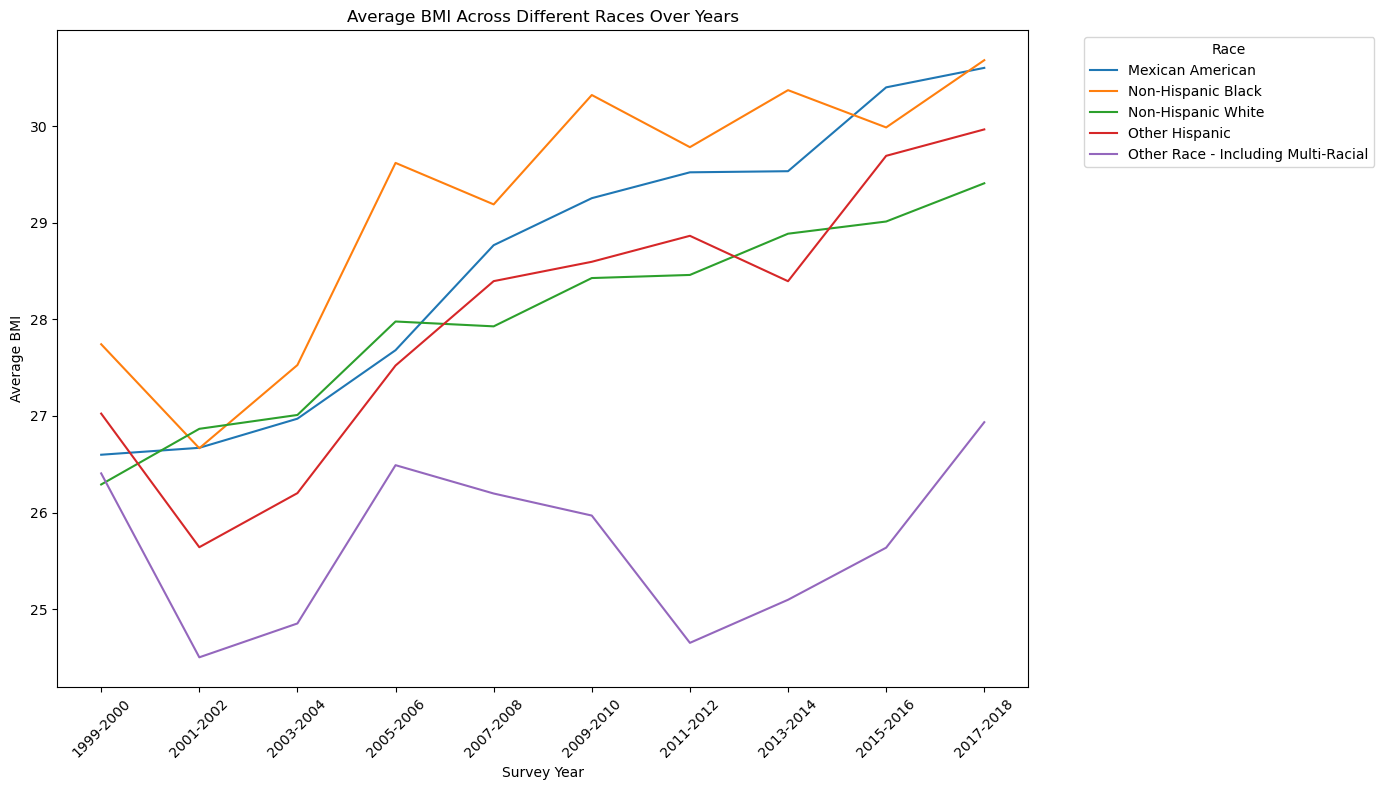

In [26]:
# Grouping data by survey year and race and calculating the average BMI
grouped_yearly_race_data = df.groupby(['SDDSRVYR', 'RIDRETH1'])['BMXBMI'].mean().reset_index()

# Creating the line plot
plt.figure(figsize=(14, 8))
sns.lineplot(x='SDDSRVYR', y='BMXBMI', hue='RIDRETH1', data=grouped_yearly_race_data)
plt.title('Average BMI Across Different Races Over Years')
plt.xlabel('Survey Year')
plt.ylabel('Average BMI')
plt.xticks(rotation=45)
plt.legend(title='Race', bbox_to_anchor=(1.05, 1), loc=2)
plt.tight_layout()

# Show the plot
plt.show()


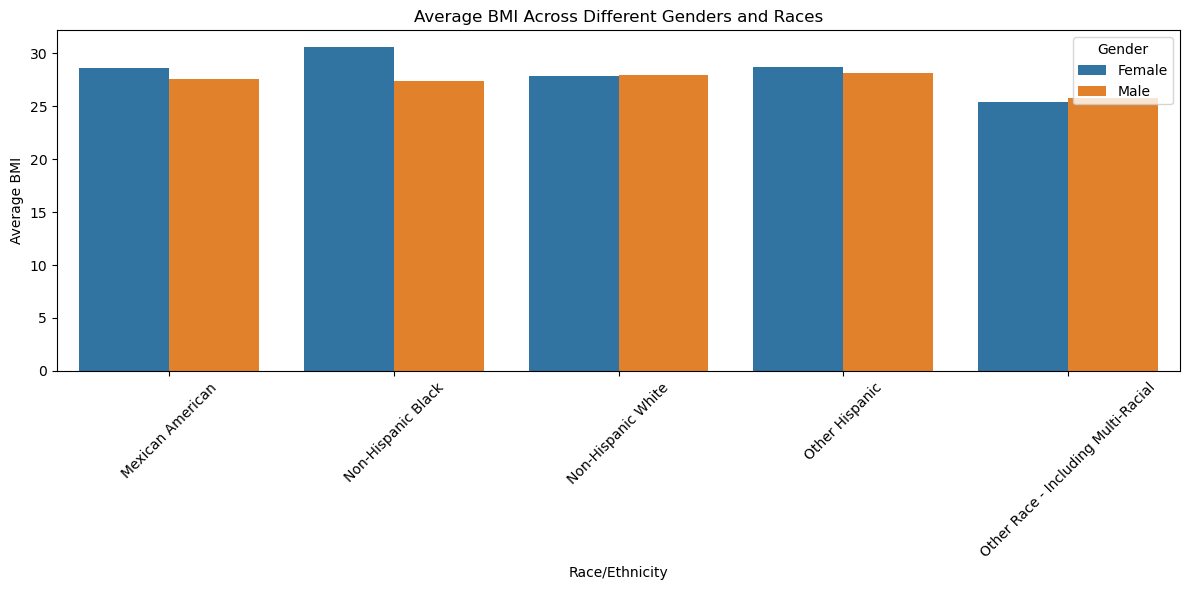

In [27]:
# Grouping data by gender and race and calculating the average BMI
grouped_data = df.groupby(['RIAGENDR', 'RIDRETH1'])['BMXBMI'].mean().reset_index()

# Creating the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='RIDRETH1', y='BMXBMI', hue='RIAGENDR', data=grouped_data)
plt.title('Average BMI Across Different Genders and Races')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Average BMI')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()

# Show the plot
plt.show()

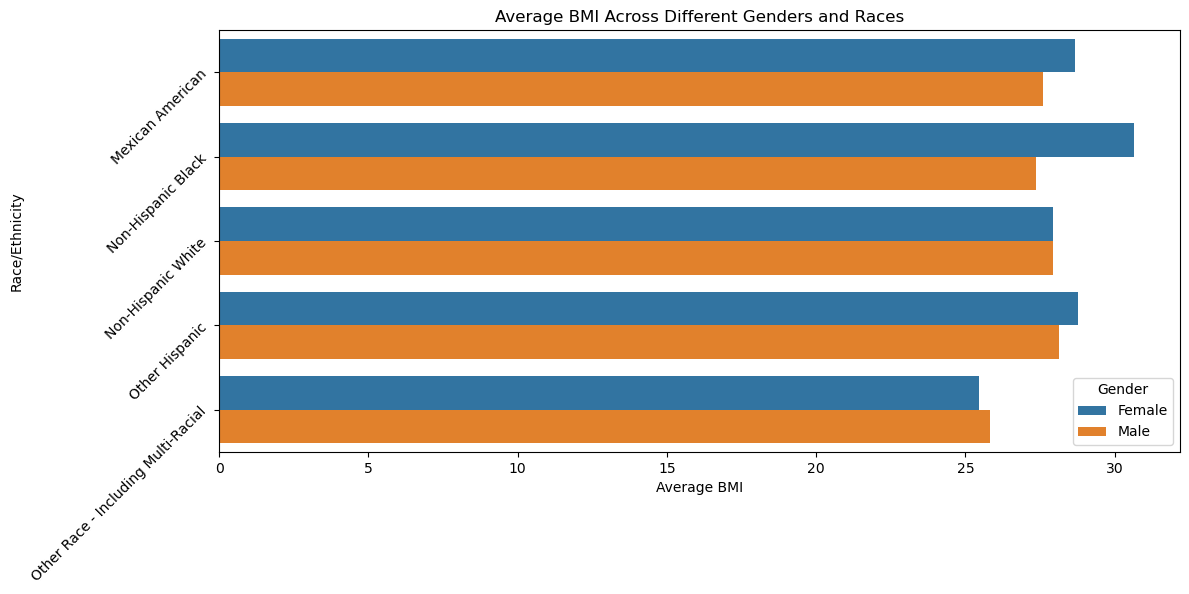

In [28]:
# Grouping data by gender and race and calculating the average BMI
grouped_data = df.groupby(['RIAGENDR', 'RIDRETH1'])['BMXBMI'].mean().reset_index()

# Creating the horizontal bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='BMXBMI', y='RIDRETH1', hue='RIAGENDR', data=grouped_data)  # Setting custom colors
plt.title('Average BMI Across Different Genders and Races')
plt.ylabel('Race/Ethnicity')  # Adjusting axis labels
plt.xlabel('Average BMI')
plt.yticks(rotation=45)  # Rotating y-axis labels
plt.legend(title='Gender')
plt.tight_layout()

# Show the plot
plt.show()


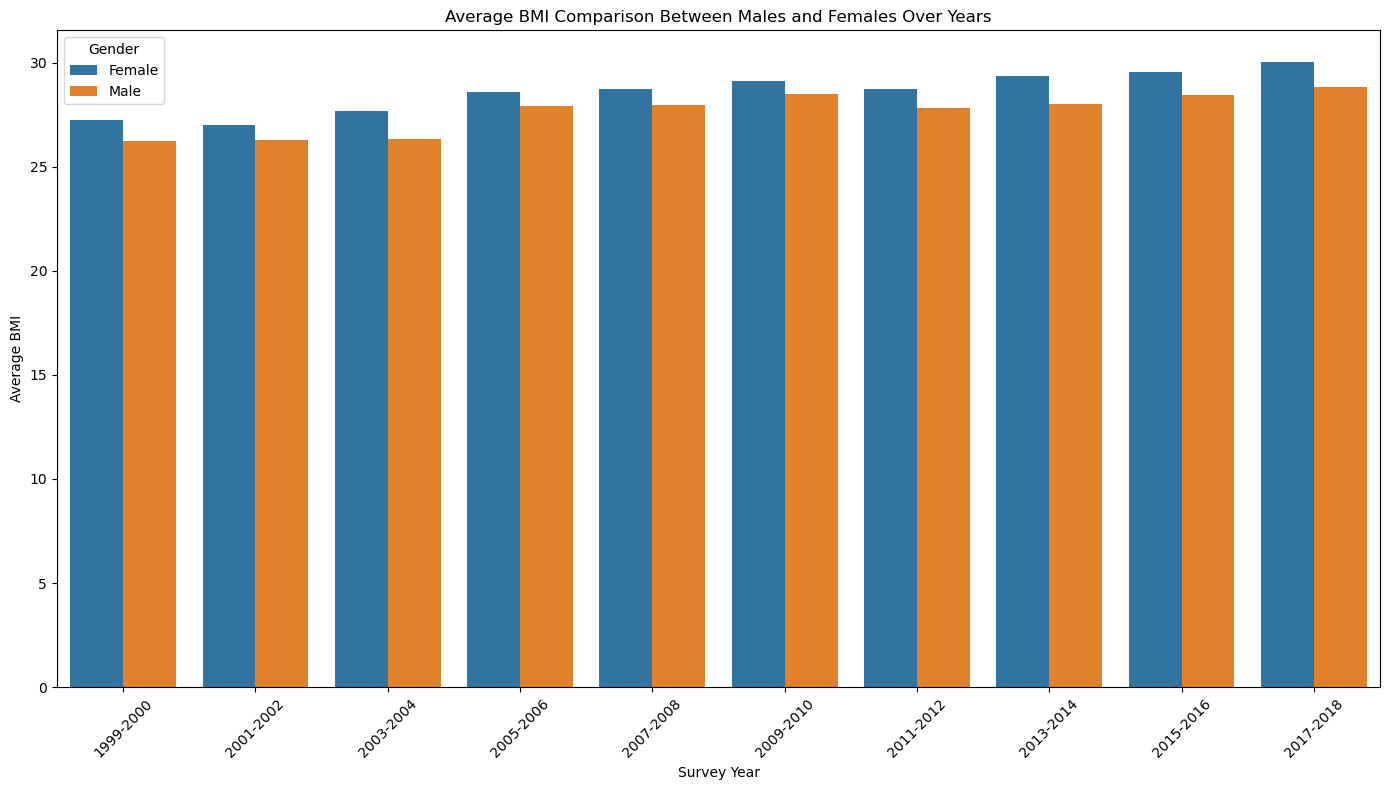

In [29]:
# Grouping data by survey year and gender and calculating the average BMI
grouped_yearly_gender_data = df.groupby(['SDDSRVYR', 'RIAGENDR'])['BMXBMI'].mean().reset_index()

# Creating the bar chart
plt.figure(figsize=(14, 8))
sns.barplot(x='SDDSRVYR', y='BMXBMI', hue='RIAGENDR', data=grouped_yearly_gender_data)
plt.title('Average BMI Comparison Between Males and Females Over Years')
plt.xlabel('Survey Year')
plt.ylabel('Average BMI')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()

# Show the plot
plt.show()


#### Body Mass Indexy (BMI) has been trending over for every ethnic group over the years. In the NHANES dataset you can see the upward trend from 1999-2018 how BMI has been steadly increasing especially in the African American communites and the Hispanic population. It is also noteworthy to see the trend is also increasing in Whites and other races as well. Females have great BMI than males. 

## Blood Pressure 

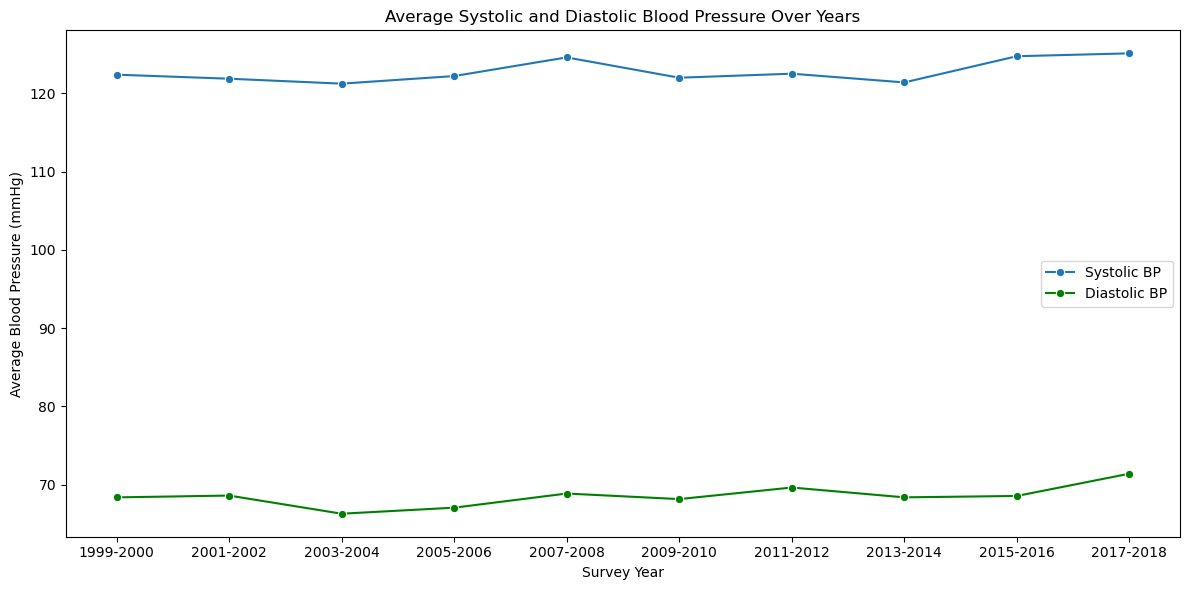

In [30]:
# Filtering relevant columns for systolic and diastolic blood pressure and survey year
bp_data = df[['SDDSRVYR', 'BPXSY1', 'BPXDI1']]

# Grouping data by survey year and calculating the average systolic and diastolic blood pressure
grouped_bp_yearly = bp_data.groupby('SDDSRVYR').mean().reset_index()

# Creating a combined line plot for systolic and diastolic blood pressure
plt.figure(figsize=(12, 6))

# Systolic Blood Pressure
sns.lineplot(x='SDDSRVYR', y='BPXSY1', data=grouped_bp_yearly, marker='o', label='Systolic BP')

# Diastolic Blood Pressure
sns.lineplot(x='SDDSRVYR', y='BPXDI1', data=grouped_bp_yearly, color='green', marker='o', label='Diastolic BP')

plt.title('Average Systolic and Diastolic Blood Pressure Over Years')
plt.ylabel('Average Blood Pressure (mmHg)')
plt.xlabel('Survey Year')
plt.legend()
plt.tight_layout()

plt.show()


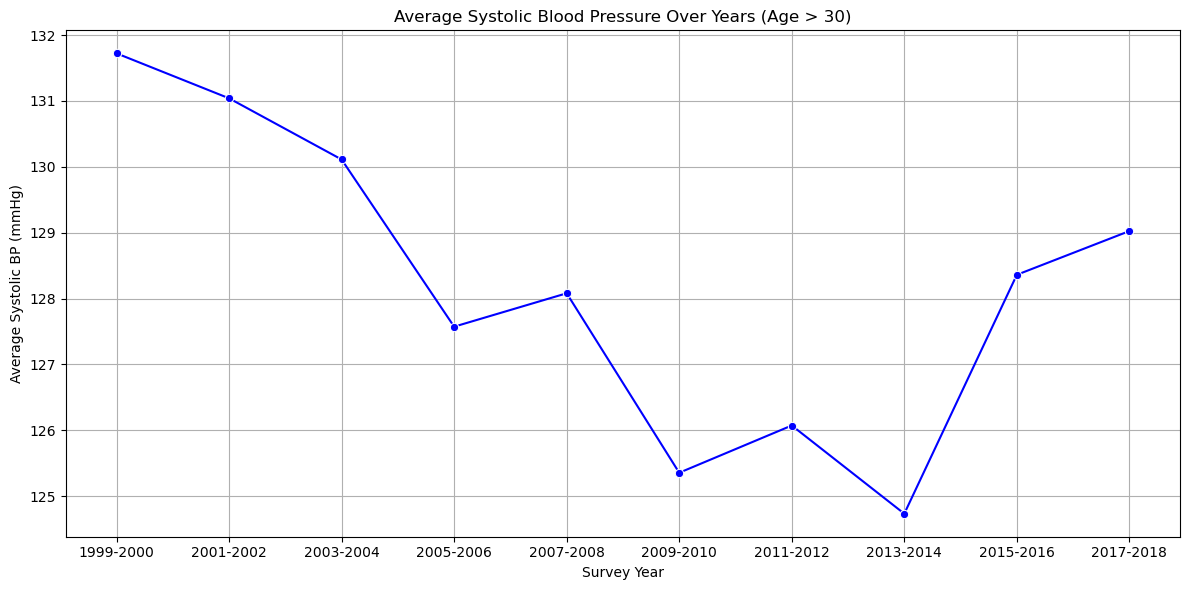

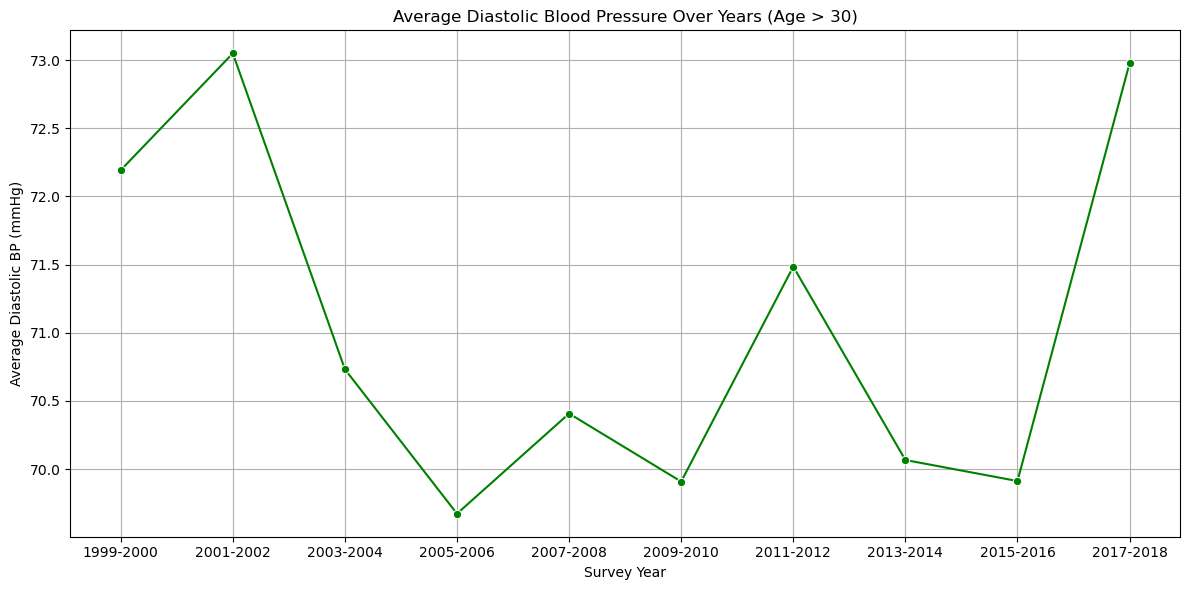

In [31]:
# Filtering the dataset for participants over the age of 30
bp_data_over_30 = df[df['RIDAGEYR'] > 30]

# Grouping data by survey year and calculating the average systolic and diastolic blood pressure for this age group
grouped_bp_yearly_over_30 = bp_data_over_30.groupby('SDDSRVYR').mean().reset_index()

# Creating separate line plots for systolic and diastolic blood pressure for participants over the age of 30

# Systolic Blood Pressure Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='SDDSRVYR', y='BPXSY1', data=grouped_bp_yearly_over_30, marker='o', color='blue')
plt.title('Average Systolic Blood Pressure Over Years (Age > 30)')
plt.ylabel('Average Systolic BP (mmHg)')
plt.xlabel('Survey Year')
plt.tight_layout()
plt.grid()
plt.show()

# Diastolic Blood Pressure Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='SDDSRVYR', y='BPXDI1', data=grouped_bp_yearly_over_30, marker='o', color='green')
plt.title('Average Diastolic Blood Pressure Over Years (Age > 30)')
plt.ylabel('Average Diastolic BP (mmHg)')
plt.xlabel('Survey Year')
plt.tight_layout()
plt.grid()
plt.show()


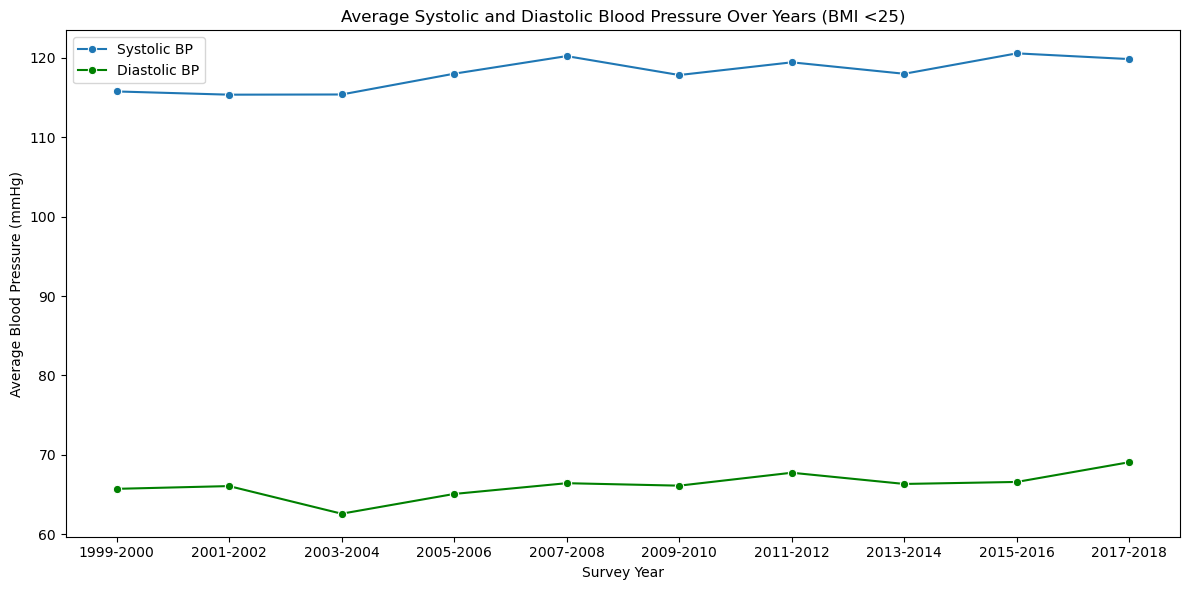

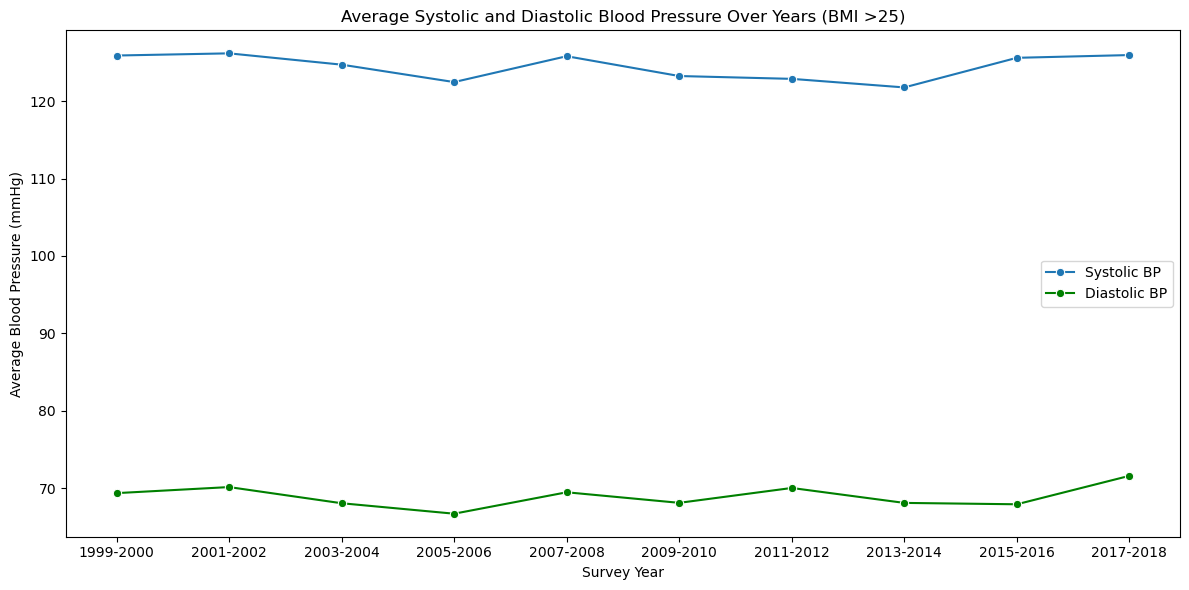

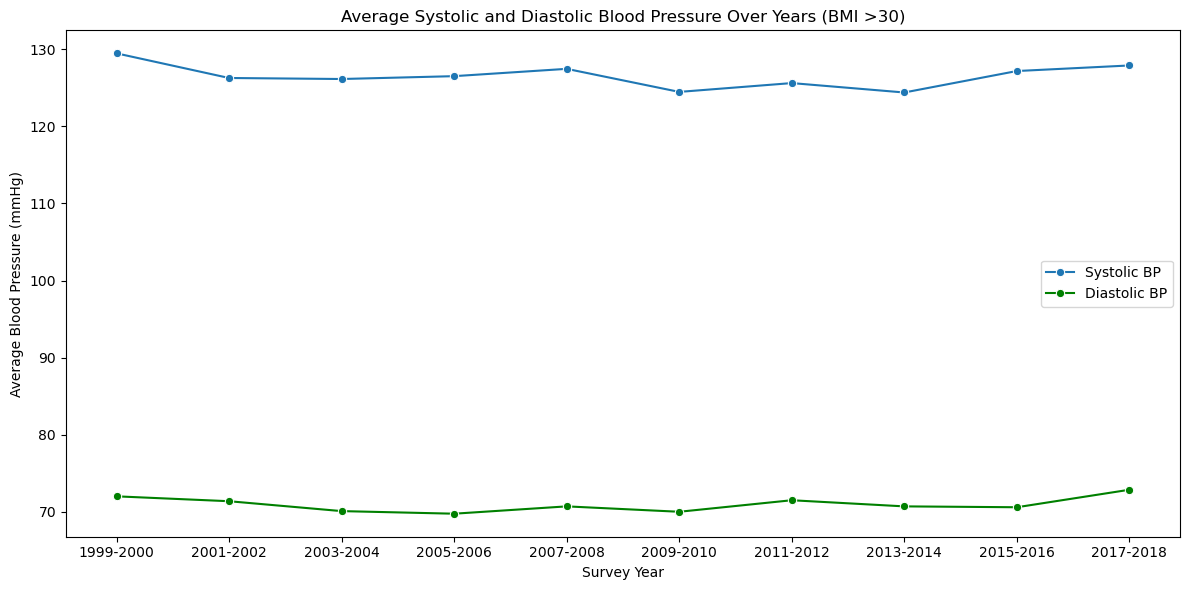

In [32]:
# Filtering relevant columns for systolic and diastolic blood pressure and survey year
bm_bp_data = df[['SDDSRVYR', 'BMXBMI', 'BPXSY1', 'BPXDI1']]

# filtering to records where BMI < 25 and grouping data by survey year and calculating the average systolic and diastolic blood pressure
grouped_bp_yearly_normal_bmi = bm_bp_data[bm_bp_data['BMXBMI']<25].groupby('SDDSRVYR').mean().reset_index()
# filtering to records where BMI > 25 and grouping data by survey year and calculating the average systolic and diastolic blood pressure
grouped_bp_yearly_overweight_bmi = bm_bp_data[(bm_bp_data['BMXBMI'] >= 25) & (bm_bp_data['BMXBMI'] < 30)].groupby('SDDSRVYR').mean().reset_index()
# filtering to records where BMI < 25 and grouping data by survey year and calculating the average systolic and diastolic blood pressure
grouped_bp_yearly_obesity_bmi = bm_bp_data[bm_bp_data['BMXBMI']>30].groupby('SDDSRVYR').mean().reset_index()




plt.figure(figsize=(12, 6))
# Systolic Blood Pressure
sns.lineplot(x='SDDSRVYR', y='BPXSY1', data=grouped_bp_yearly_normal_bmi, marker='o', label='Systolic BP')
# Diastolic Blood Pressure
sns.lineplot(x='SDDSRVYR', y='BPXDI1', data=grouped_bp_yearly_normal_bmi, color='green', marker='o', label='Diastolic BP')
plt.title('Average Systolic and Diastolic Blood Pressure Over Years (BMI <25)')
plt.ylabel('Average Blood Pressure (mmHg)')
plt.xlabel('Survey Year')
plt.legend()
plt.tight_layout()



# Creating a combined line plot for systolic and diastolic blood pressure
plt.figure(figsize=(12, 6))
# Systolic Blood Pressure
sns.lineplot(x='SDDSRVYR', y='BPXSY1', data=grouped_bp_yearly_overweight_bmi, marker='o', label='Systolic BP')
# Diastolic Blood Pressure
sns.lineplot(x='SDDSRVYR', y='BPXDI1', data=grouped_bp_yearly_overweight_bmi, color='green', marker='o', label='Diastolic BP')
plt.title('Average Systolic and Diastolic Blood Pressure Over Years (BMI >25)')
plt.ylabel('Average Blood Pressure (mmHg)')
plt.xlabel('Survey Year')
plt.legend()
plt.tight_layout()

# Creating a combined line plot for systolic and diastolic blood pressure
plt.figure(figsize=(12, 6))
# Systolic Blood Pressure
sns.lineplot(x='SDDSRVYR', y='BPXSY1', data=grouped_bp_yearly_obesity_bmi, marker='o', label='Systolic BP')
# Diastolic Blood Pressure
sns.lineplot(x='SDDSRVYR', y='BPXDI1', data=grouped_bp_yearly_obesity_bmi, color='green', marker='o', label='Diastolic BP')
plt.title('Average Systolic and Diastolic Blood Pressure Over Years (BMI >30)')
plt.ylabel('Average Blood Pressure (mmHg)')
plt.xlabel('Survey Year')
plt.legend()
plt.tight_layout()

plt.show()

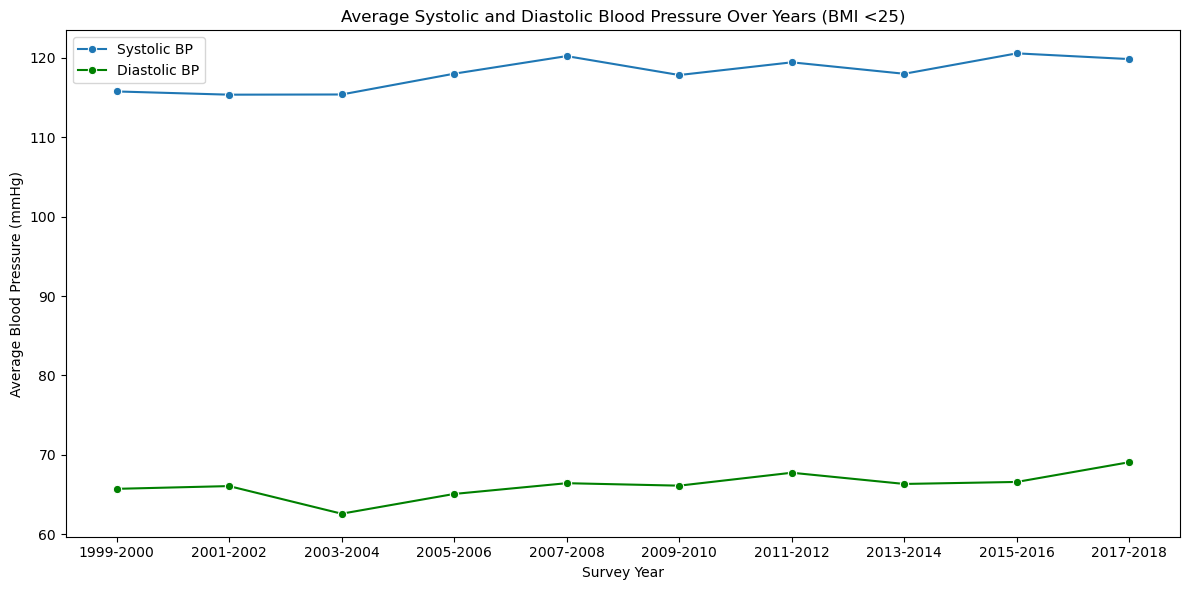

In [33]:
# Filtering relevant columns for systolic and diastolic blood pressure and survey year
bm_bp_data = df[['SDDSRVYR', 'BMXBMI', 'BPXSY1', 'BPXDI1']]
# filtering to records where BMI < 25 and grouping data by survey year and calculating the average systolic and diastolic blood pressure
grouped_bp_yearly_normal_bmi = bm_bp_data[bm_bp_data['BMXBMI']<25].groupby('SDDSRVYR').mean().reset_index()


# Creating a combined line plot for systolic and diastolic blood pressure
plt.figure(figsize=(12, 6))

# Systolic Blood Pressure
sns.lineplot(x='SDDSRVYR', y='BPXSY1', data=grouped_bp_yearly_normal_bmi, marker='o', label='Systolic BP')

# Diastolic Blood Pressure
sns.lineplot(x='SDDSRVYR', y='BPXDI1', data=grouped_bp_yearly_normal_bmi, color='green', marker='o', label='Diastolic BP')

plt.title('Average Systolic and Diastolic Blood Pressure Over Years (BMI <25)')
plt.ylabel('Average Blood Pressure (mmHg)')
plt.xlabel('Survey Year')
plt.legend()
plt.tight_layout()

plt.show()

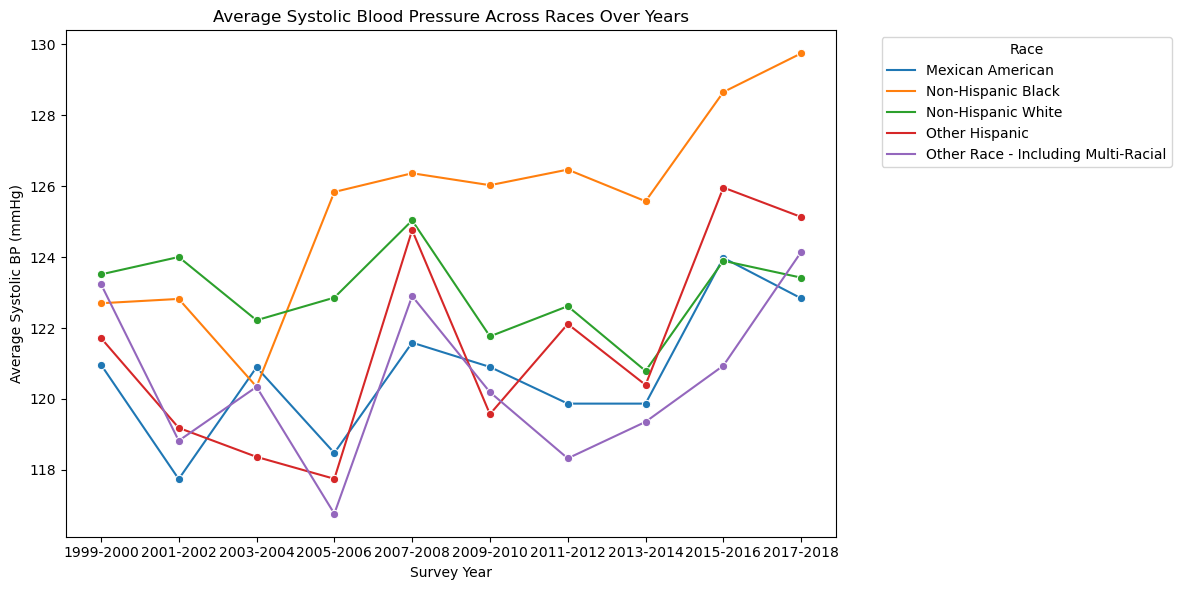

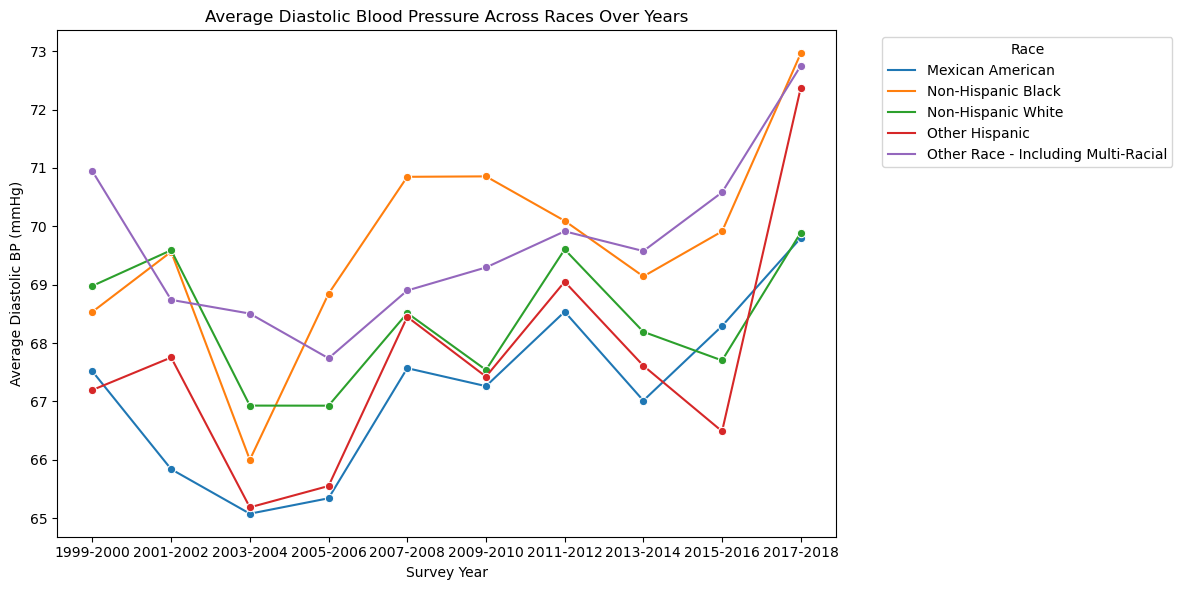

In [34]:
# Grouping data by race and survey year, and calculating the average systolic and diastolic blood pressures
grouped_bp_race = df.groupby(['SDDSRVYR', 'RIDRETH1']).mean().reset_index()

# Creating separate line plots for systolic and diastolic blood pressure across races

# Systolic Blood Pressure Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='SDDSRVYR', y='BPXSY1', hue='RIDRETH1', data=grouped_bp_race, marker='o')
plt.title('Average Systolic Blood Pressure Across Races Over Years')
plt.ylabel('Average Systolic BP (mmHg)')
plt.xlabel('Survey Year')
plt.legend(title='Race', bbox_to_anchor=(1.05, 1), loc=2)
plt.tight_layout()
plt.show()

# Diastolic Blood Pressure Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='SDDSRVYR', y='BPXDI1', hue='RIDRETH1', data=grouped_bp_race, marker='o')
plt.title('Average Diastolic Blood Pressure Across Races Over Years')
plt.ylabel('Average Diastolic BP (mmHg)')
plt.xlabel('Survey Year')
plt.legend(title='Race', bbox_to_anchor=(1.05, 1), loc=2)
plt.tight_layout()
plt.show()


#### Blood pressure is intertwined with obesity. Obesity can have a huge impact on blood pressure and it largely affects the cardiovascuar system. Increase blood pressure causes heart to pump harder which increases the left ventricular and therefore decreased in cardic output. Another problem with increase blood pressure puts alot of added pressures to the arterial walls therefore changing the elasticity of the arterial wall.

## BMI

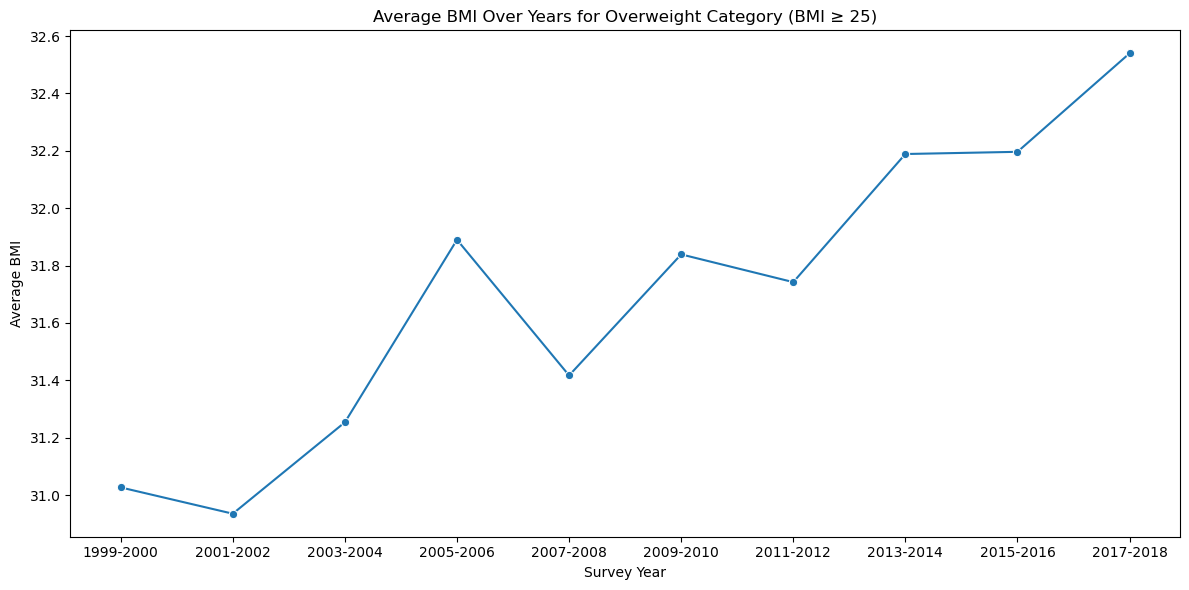

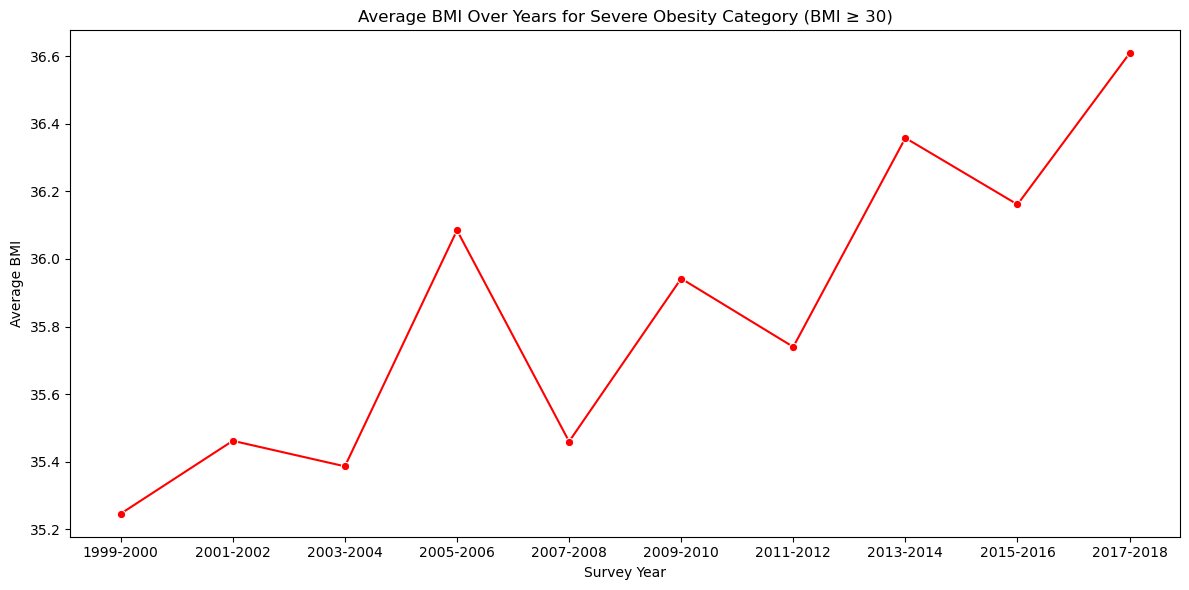

In [35]:

# Filtering the dataset for the Overweight category (BMI >= 25)
overweight_data = df[df['BMXBMI'] >= 25]

# Grouping data by survey year and calculating the average BMI for the Overweight category
grouped_overweight_yearly = overweight_data.groupby('SDDSRVYR')['BMXBMI'].mean().reset_index()

# Creating the line plot for the Overweight category
plt.figure(figsize=(12, 6))
sns.lineplot(x='SDDSRVYR', y='BMXBMI', data=grouped_overweight_yearly, marker='o')
plt.title('Average BMI Over Years for Overweight Category (BMI ≥ 25)')
plt.ylabel('Average BMI')
plt.xlabel('Survey Year')
plt.tight_layout()
plt.show()

# Filtering the dataset for the Severe Obesity category (BMI >= 30)
severe_obesity_data = df[df['BMXBMI'] >= 30]

# Grouping data by survey year and calculating the average BMI for the Severe Obesity category
grouped_severe_obesity_yearly = severe_obesity_data.groupby('SDDSRVYR')['BMXBMI'].mean().reset_index()

# Creating the line plot for the Severe Obesity category
plt.figure(figsize=(12, 6))
sns.lineplot(x='SDDSRVYR', y='BMXBMI', data=grouped_severe_obesity_yearly, marker='o', color='red')
plt.title('Average BMI Over Years for Severe Obesity Category (BMI ≥ 30)')
plt.ylabel('Average BMI')
plt.xlabel('Survey Year')
plt.tight_layout()
plt.show()


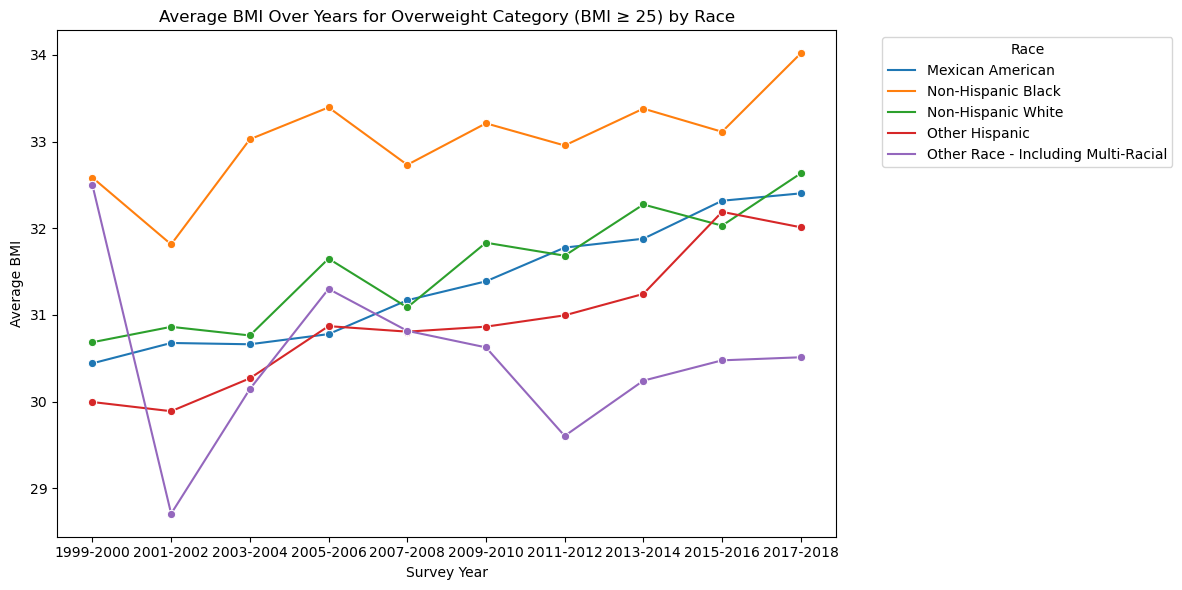

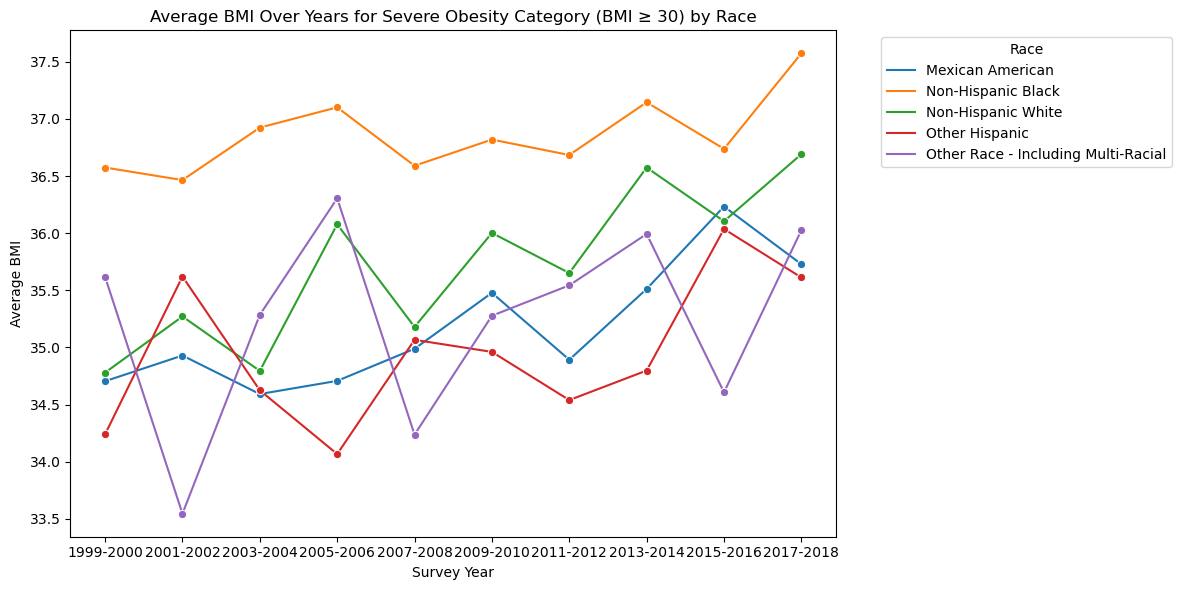

In [36]:
# Filtering the dataset for the Overweight category (BMI >= 25) and Severe Obesity category (BMI >= 30)
overweight_data_by_race = df[df['BMXBMI'] >= 25]
severe_obesity_data_by_race = df[df['BMXBMI'] >= 30]

# Grouping data by survey year and race, and calculating the average BMI for the Overweight and Severe Obesity categories
grouped_overweight_yearly_by_race = overweight_data_by_race.groupby(['SDDSRVYR', 'RIDRETH1'])['BMXBMI'].mean().reset_index()
grouped_severe_obesity_yearly_by_race = severe_obesity_data_by_race.groupby(['SDDSRVYR', 'RIDRETH1'])['BMXBMI'].mean().reset_index()

# Creating the line plots

# Line plot for the Overweight category by race
plt.figure(figsize=(12, 6))
sns.lineplot(x='SDDSRVYR', y='BMXBMI', hue='RIDRETH1', data=grouped_overweight_yearly_by_race, marker='o')
plt.title('Average BMI Over Years for Overweight Category (BMI ≥ 25) by Race')
plt.ylabel('Average BMI')
plt.xlabel('Survey Year')
plt.legend(title='Race', bbox_to_anchor=(1.05, 1), loc=2)
plt.tight_layout()
plt.show()

# Line plot for the Severe Obesity category by race
plt.figure(figsize=(12, 6))
sns.lineplot(x='SDDSRVYR', y='BMXBMI', hue='RIDRETH1', data=grouped_severe_obesity_yearly_by_race, marker='o')
plt.title('Average BMI Over Years for Severe Obesity Category (BMI ≥ 30) by Race')
plt.ylabel('Average BMI')
plt.xlabel('Survey Year')
plt.legend(title='Race', bbox_to_anchor=(1.05, 1), loc=2)
plt.tight_layout()
plt.show()


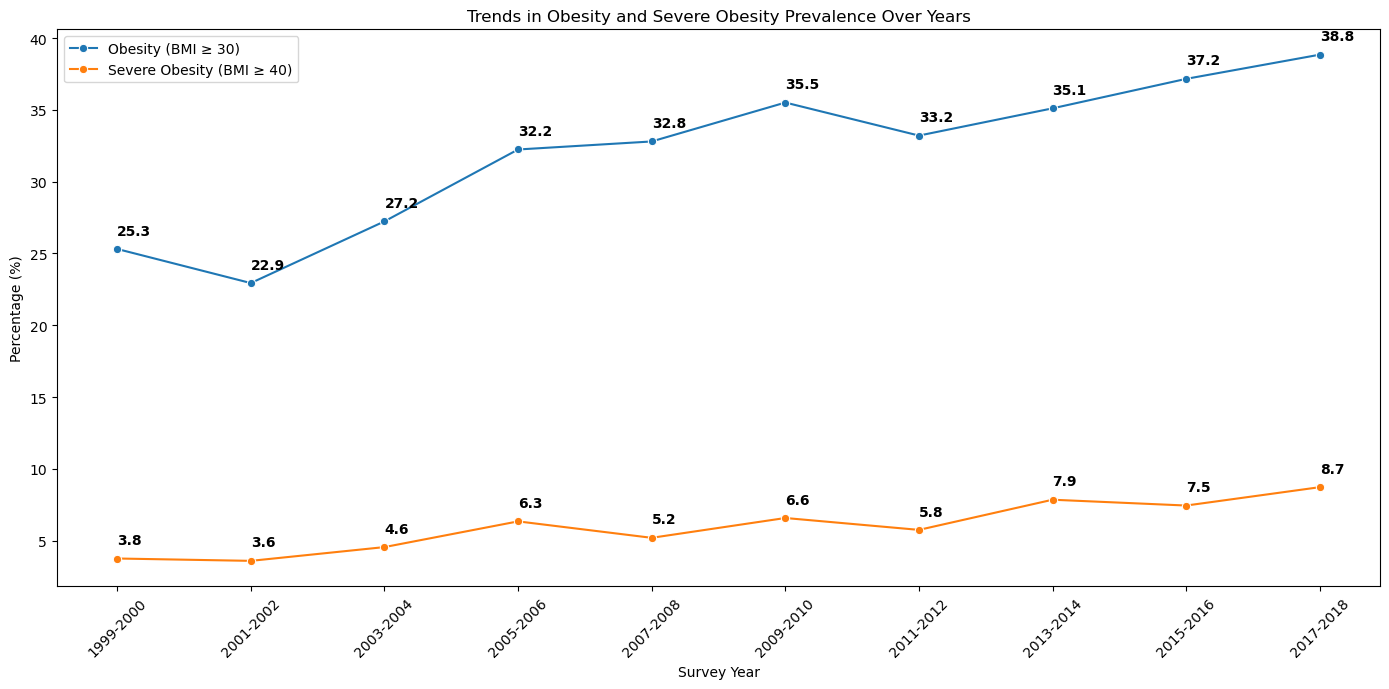

In [37]:
# Grouping data by survey year and counting the number of obese and severely obese individuals
obesity_counts = df[df['BMXBMI'] >= 30].groupby('SDDSRVYR').size()
severe_obesity_counts = df[df['BMXBMI'] >= 40].groupby('SDDSRVYR').size()

# Calculating total participants each year to find the percentage
total_counts = df.groupby('SDDSRVYR').size()

# Calculating the percentages
obesity_percentage = (obesity_counts / total_counts * 100).reset_index(name='ObesityPercent')
severe_obesity_percentage = (severe_obesity_counts / total_counts * 100).reset_index(name='SevereObesityPercent')

# Merging the percentage data for plotting
percentage_data = pd.merge(obesity_percentage, severe_obesity_percentage, on='SDDSRVYR')

# Creating the line plot with annotations for the percentages
plt.figure(figsize=(14, 7))

# Plotting Obesity Data
sns.lineplot(x='SDDSRVYR', y='ObesityPercent', data=percentage_data, marker='o', label='Obesity (BMI ≥ 30)')

# Plotting Severe Obesity Data
sns.lineplot(x='SDDSRVYR', y='SevereObesityPercent', data=percentage_data, marker='o', label='Severe Obesity (BMI ≥ 40)')

# Adding annotations for percentages
for line in [obesity_percentage, severe_obesity_percentage]:
    for index, row in line.iterrows():
        plt.text(row['SDDSRVYR'], row[line.columns[1]] + 1, round(row[line.columns[1]], 1), 
                 horizontalalignment='left', size='medium', color='black', weight='semibold')

plt.title('Trends in Obesity and Severe Obesity Prevalence Over Years')
plt.ylabel('Percentage (%)')
plt.xlabel('Survey Year')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


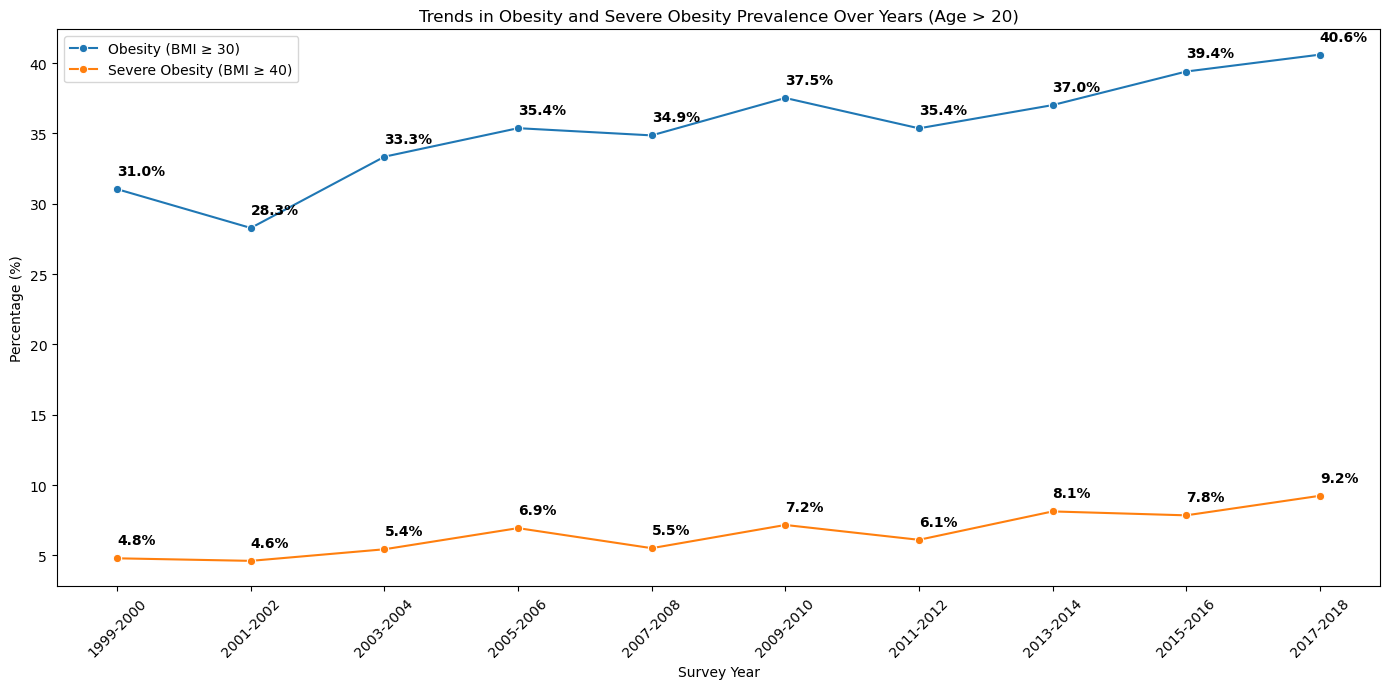

In [38]:
# Filtering the dataset for individuals over 20 years old
data_over_20 = df[df['RIDAGEYR'] > 20]

# Grouping data by survey year and counting the number of obese and severely obese individuals over 20 years old
obesity_counts_over_20 = data_over_20[data_over_20['BMXBMI'] >= 30].groupby('SDDSRVYR').size()
severe_obesity_counts_over_20 = data_over_20[data_over_20['BMXBMI'] >= 40].groupby('SDDSRVYR').size()

# Calculating total participants over 20 years old each year to find the percentage
total_counts_over_20 = data_over_20.groupby('SDDSRVYR').size()

# Calculating the percentages for the population over 20 years old
obesity_percentage_over_20 = (obesity_counts_over_20 / total_counts_over_20 * 100).reset_index(name='ObesityPercent')
severe_obesity_percentage_over_20 = (severe_obesity_counts_over_20 / total_counts_over_20 * 100).reset_index(name='SevereObesityPercent')

# Merging the percentage data for plotting
percentage_data_over_20 = pd.merge(obesity_percentage_over_20, severe_obesity_percentage_over_20, on='SDDSRVYR')

# Creating the line plot with annotations for the percentages
plt.figure(figsize=(14, 7))

# Plotting Obesity Data for age over 20
sns.lineplot(x='SDDSRVYR', y='ObesityPercent', data=percentage_data_over_20, marker='o', label='Obesity (BMI ≥ 30)')

# Plotting Severe Obesity Data for age over 20
sns.lineplot(x='SDDSRVYR', y='SevereObesityPercent', data=percentage_data_over_20, marker='o', label='Severe Obesity (BMI ≥ 40)')

# Adding annotations for percentages
for line in [obesity_percentage_over_20, severe_obesity_percentage_over_20]:
    for index, row in line.iterrows():
        plt.text(row['SDDSRVYR'], row[line.columns[1]] + 1, f"{row[line.columns[1]]:0.1f}%", 
                 horizontalalignment='left', size='medium', color='black', weight='semibold')

plt.title('Trends in Obesity and Severe Obesity Prevalence Over Years (Age > 20)')
plt.ylabel('Percentage (%)')
plt.xlabel('Survey Year')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


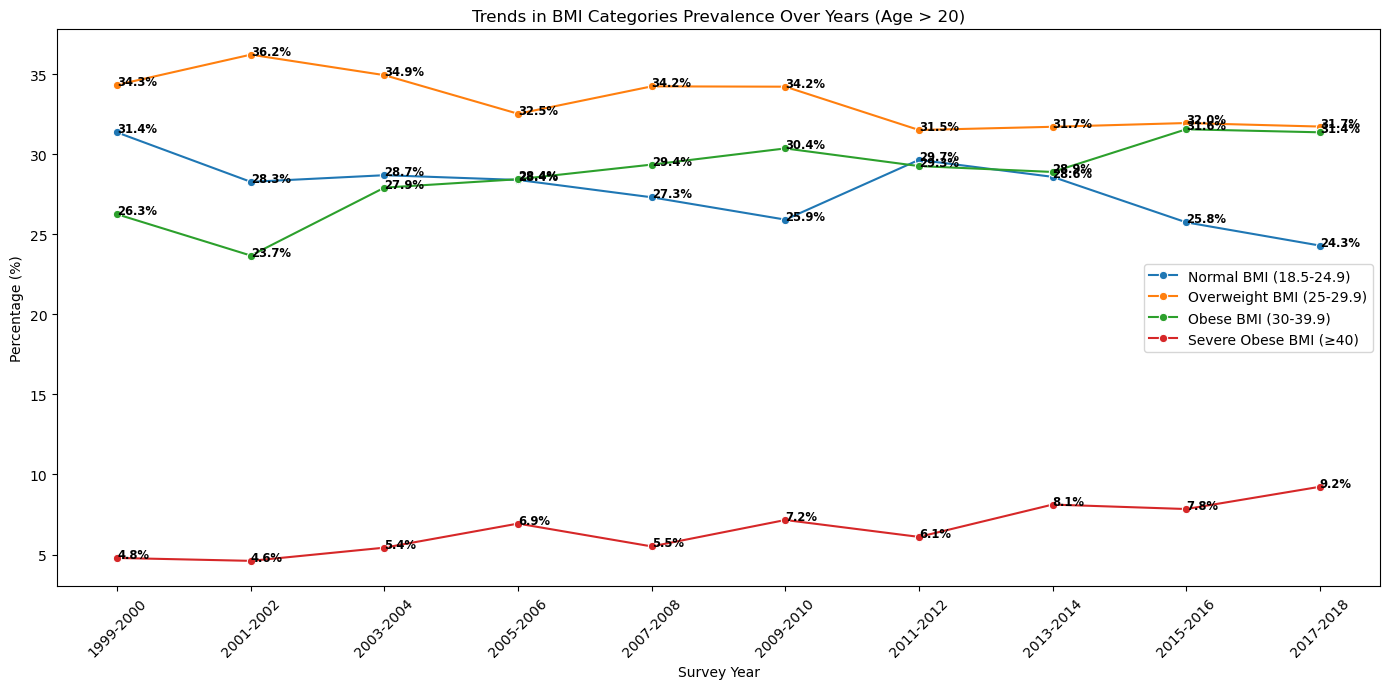

In [39]:
# Defining BMI categories
normal_bmi = (data_over_20['BMXBMI'] >= 18.5) & (data_over_20['BMXBMI'] < 25)
overweight_bmi = (data_over_20['BMXBMI'] >= 25) & (data_over_20['BMXBMI'] < 30)
obese_bmi = (data_over_20['BMXBMI'] >= 30) & (data_over_20['BMXBMI'] < 40)
severe_obese_bmi = data_over_20['BMXBMI'] >= 40

# Calculating the counts for each BMI category per year
normal_counts = data_over_20[normal_bmi].groupby('SDDSRVYR').size()
overweight_counts = data_over_20[overweight_bmi].groupby('SDDSRVYR').size()
obese_counts = data_over_20[obese_bmi].groupby('SDDSRVYR').size()
severe_obese_counts = data_over_20[severe_obese_bmi].groupby('SDDSRVYR').size()

# Calculating percentages
normal_percentage = (normal_counts / total_counts_over_20 * 100).reset_index(name='NormalBMI')
overweight_percentage = (overweight_counts / total_counts_over_20 * 100).reset_index(name='OverweightBMI')
obese_percentage = (obese_counts / total_counts_over_20 * 100).reset_index(name='ObeseBMI')
severe_obese_percentage = (severe_obese_counts / total_counts_over_20 * 100).reset_index(name='SevereObeseBMI')

# Merging all the percentage data for plotting
percentage_data_all_categories = pd.merge(normal_percentage, overweight_percentage, on='SDDSRVYR')
percentage_data_all_categories = pd.merge(percentage_data_all_categories, obese_percentage, on='SDDSRVYR')
percentage_data_all_categories = pd.merge(percentage_data_all_categories, severe_obese_percentage, on='SDDSRVYR')

# Creating the line plot for all categories
plt.figure(figsize=(14, 7))

# Plotting Normal BMI Data
sns.lineplot(x='SDDSRVYR', y='NormalBMI', data=percentage_data_all_categories, marker='o', label='Normal BMI (18.5-24.9)')

# Plotting Overweight BMI Data
sns.lineplot(x='SDDSRVYR', y='OverweightBMI', data=percentage_data_all_categories, marker='o', label='Overweight BMI (25-29.9)')

# Plotting Obese BMI Data
sns.lineplot(x='SDDSRVYR', y='ObeseBMI', data=percentage_data_all_categories, marker='o', label='Obese BMI (30-39.9)')

# Plotting Severe Obese BMI Data
sns.lineplot(x='SDDSRVYR', y='SevereObeseBMI', data=percentage_data_all_categories, marker='o', label='Severe Obese BMI (≥40)')

# Adding annotations for percentages
for line in [normal_percentage, overweight_percentage, obese_percentage, severe_obese_percentage]:
    for index, row in line.iterrows():
        plt.text(row['SDDSRVYR'], row[line.columns[1]], f"{row[line.columns[1]]:0.1f}%", 
                 horizontalalignment='left', size='small', color='black', weight='semibold')

plt.title('Trends in BMI Categories Prevalence Over Years (Age > 20)')
plt.ylabel('Percentage (%)')
plt.xlabel('Survey Year')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



#### The percentages of Americans who are over weight is staggering. With BMI reaching 40% of the adult population is alarming. These charts clearly show that the obesity levels trending upwards. Children are our future and if they are overweight they tend to pack on that weight as adults. 

## Anova 

In [48]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Categorizing BMI into the specified new groups
conditions = [
    (df['BMXBMI'] <= 18.5),
    (df['BMXBMI'] > 18.5) & (df['BMXBMI'] <= 25),
    (df['BMXBMI'] > 25) & (df['BMXBMI'] <= 30),
    (df['BMXBMI'] > 30) & (df['BMXBMI'] <= 40),
    (df['BMXBMI'] > 40)
]

choices = ['Underweight', 'Normal', 'Overweight', 'Obese', 'Severely Obese']

df['BMI_Category'] = np.select(conditions, choices, default='Other')

# Removing rows where either BMI or Vitamin D data is missing
cleaned_df = df[['BMXBMI', 'LBXVIDMS', 'BMI_Category']].dropna()

# Extracting Vitamin D levels for each category
vitd_underweight = cleaned_df[cleaned_df['BMI_Category'] == 'Underweight']['LBXVIDMS']
vitd_normal = cleaned_df[cleaned_df['BMI_Category'] == 'Normal']['LBXVIDMS']
vitd_overweight = cleaned_df[cleaned_df['BMI_Category'] == 'Overweight']['LBXVIDMS']
vitd_obese = cleaned_df[cleaned_df['BMI_Category'] == 'Obese']['LBXVIDMS']
vitd_severely_obese = cleaned_df[cleaned_df['BMI_Category'] == 'Severely Obese']['LBXVIDMS']

# Performing ANOVA test
anova_result = f_oneway(vitd_underweight, vitd_normal, vitd_overweight, vitd_obese, vitd_severely_obese)

# Perform Tukey's HSD test for pairwise comparisons
tukey_results = pairwise_tukeyhsd(endog=cleaned_df['LBXVIDMS'], groups=cleaned_df['BMI_Category'], alpha=0.05)
tukey_summary_df = pd.DataFrame(data=tukey_results._results_table.data[1:], columns=tukey_results._results_table.data[0])

# ANOVA result and Tukey's HSD test p-values
anova_pvalue = anova_result.pvalue
tukey_p_values = tukey_summary_df[['group1', 'group2', 'p-adj']]

anova_pvalue, tukey_p_values


(3.3336434276314164e-75,
            group1          group2   p-adj
 0          Normal           Obese  0.0000
 1          Normal      Overweight  0.0075
 2          Normal  Severely Obese  0.0000
 3          Normal     Underweight  0.0047
 4           Obese      Overweight  0.0000
 5           Obese  Severely Obese  0.0000
 6           Obese     Underweight  0.7594
 7      Overweight  Severely Obese  0.0000
 8      Overweight     Underweight  0.1539
 9  Severely Obese     Underweight  0.0000)

In [49]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform Tukey's HSD test again with the cleaned data
tukey_results = pairwise_tukeyhsd(endog=cleaned_df['LBXVIDMS'], groups=cleaned_df['BMI_Category'], alpha=0.05)

# Extracting the results into a DataFrame
tukey_summary_df = pd.DataFrame(data=tukey_results._results_table.data[1:], columns=tukey_results._results_table.data[0])

# Displaying the p-values for each pairwise comparison
tukey_p_values = tukey_summary_df[['group1', 'group2', 'p-adj']]
tukey_p_values

group1          group2   p-adj
0          Normal           Obese  0.0000
1          Normal      Overweight  0.0075
2          Normal  Severely Obese  0.0000
3          Normal     Underweight  0.0047
4           Obese      Overweight  0.0000
5           Obese  Severely Obese  0.0000
6           Obese     Underweight  0.7594
7      Overweight  Severely Obese  0.0000
8      Overweight     Underweight  0.1539
9  Severely Obese     Underweight  0.0000

#### You can clearly see the difference between different BMI. Comparing the BMI and the categories of BMI's. P- values of 0.0000 suggeest that they are highlyu significant and ther is difference in BMI between these groups. What is interesting is that the Obese vs Underweight seemed to not have significant difference but in reality they do. 

## HeatMap Organized by Income

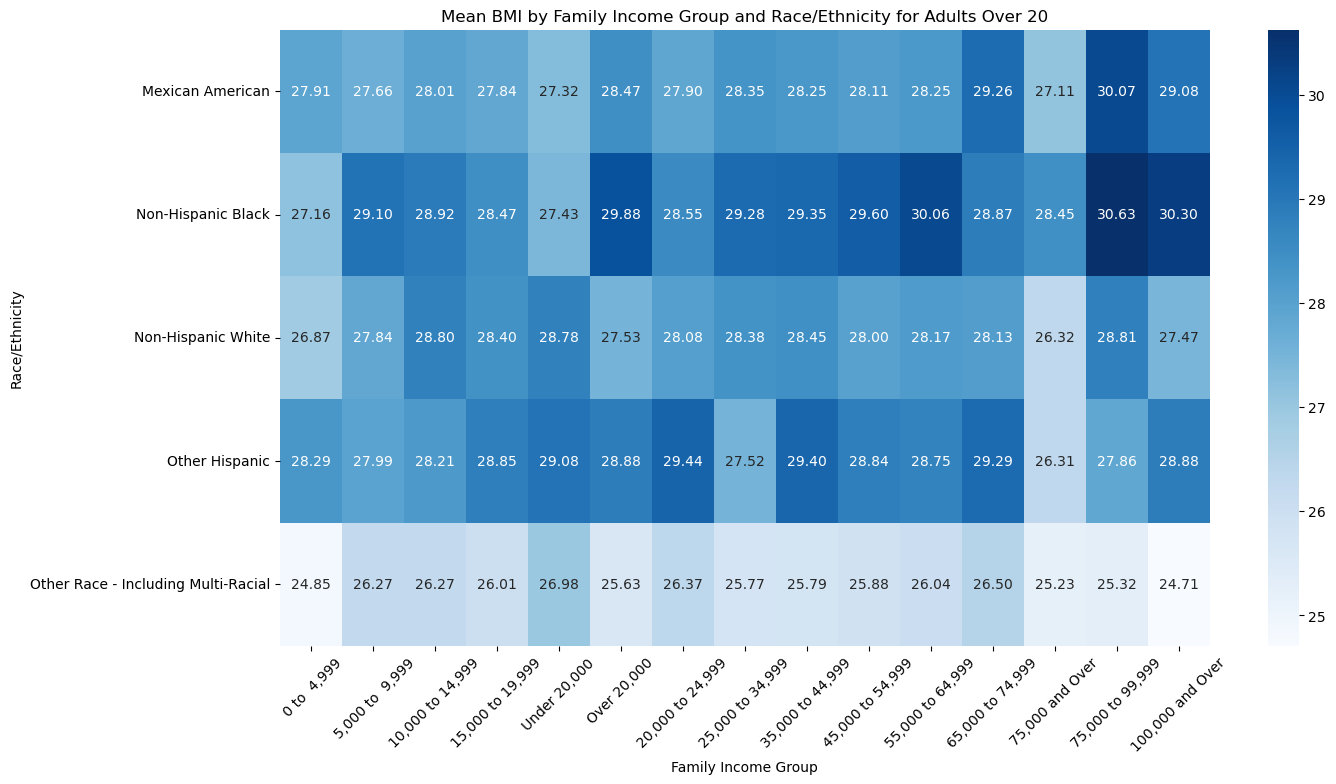

INDFMINC                              0 to  4,999   5,000 to  9,999  \
RIDRETH1                                                              
Mexican American                        27.913875         27.656088   
Non-Hispanic Black                      27.159581         29.104173   
Non-Hispanic White                      26.869078         27.839670   
Other Hispanic                          28.291609         27.986243   
Other Race - Including Multi-Racial     24.846765         26.269687   

INDFMINC                             10,000 to 14,999  15,000 to 19,999  \
RIDRETH1                                                                  
Mexican American                            28.005622         27.837522   
Non-Hispanic Black                          28.923852         28.469960   
Non-Hispanic White                          28.801669         28.400309   
Other Hispanic                              28.214786         28.847706   
Other Race - Including Multi-Racial         26.265414         26.006577   

INDFMINC                             Under 20,000  Over 20,000  \
RIDRETH1                                                         
Mexican American                        27.315581    28.473591   
Non-Hispanic Black                      27.430476    29.875902   
Non-Hispanic White                      28.780476    27.526038   
Other Hispanic                          29.081250    28.880333   
Other Race - Including Multi-Racial     26.975909    25.632812   

INDFMINC                             20,000 to 24,999  25,000 to 34,999  \
RIDRETH1                                                                  
Mexican American                            27.896056         28.354307   
Non-Hispanic Black                          28.552450         29.275024   
Non-Hispanic White                          28.083351         28.381266   
Other Hispanic                              29.441991         27.515451   
Other Race - Including Multi-Racial         26.370226         25.771850   

INDFMINC                             35,000 to 44,999  45,000 to 54,999  \
RIDRETH1                                                                  
Mexican American                            28.251573         28.113971   
Non-Hispanic Black                          29.353925         29.595980   
Non-Hispanic White                          28.448200         28.004402   
Other Hispanic                              29.401734         28.837544   
Other Race - Including Multi-Racial         25.791126         25.884939   

INDFMINC                             55,000 to 64,999  65,000 to 74,999  \
RIDRETH1                                                                  
Mexican American                            28.245461         29.263756   
Non-Hispanic Black                          30.064119         28.872811   
Non-Hispanic White                          28.174750         28.129742   
Other Hispanic                              28.750481         29.288641   
Other Race - Including Multi-Racial         26.044430         26.500323   

INDFMINC                             75,000 and Over  75,000 to 99,999  \
RIDRETH1                                                                 
Mexican American                           27.109777         30.071687   
Non-Hispanic Black                         28.454100         30.629153   
Non-Hispanic White                         26.316757         28.808501   
Other Hispanic                             26.308974         27.859431   
Other Race - Including Multi-Racial        25.233472         25.321889   

INDFMINC                             100,000 and Over  
RIDRETH1                                               
Mexican American                            29.080169  
Non-Hispanic Black                          30.303972  
Non-Hispanic White                          27.472781  
Other Hispanic                              28.882111  
Other Race - Including Multi-Racial         24.708865

In [50]:
# Grouping the data by race and income, then calculating the mean BMI for each group
mean_bmi_by_race_income = df.groupby(['RIDRETH1', 'INDFMINC'])['BMXBMI'].mean().unstack()


# rearranged the columns
mean_bmi_by_race_income = mean_bmi_by_race_income[[' 0 to  4,999', ' 5,000 to  9,999', '10,000 to 14,999',
       '15,000 to 19,999', 'Under 20,000','Over 20,000', '20,000 to 24,999',
       '25,000 to 34,999', '35,000 to 44,999', '45,000 to 54,999',
       '55,000 to 64,999', '65,000 to 74,999', '75,000 and Over',
       '75,000 to 99,999', '100,000 and Over']]

# Plotting the mean BMI for each income group by race
plt.figure(figsize=(15, 8))
sns.heatmap(mean_bmi_by_race_income, annot=True, cmap="Blues", fmt=".2f")
plt.xlabel('Family Income Group')
plt.ylabel('Race/Ethnicity')
plt.title('Mean BMI by Family Income Group and Race/Ethnicity for Adults Over 20')
plt.xticks(rotation=45)
plt.show()

mean_bmi_by_race_income


In [51]:
mean_bmi_by_race_income.columns # re arrange the columns

Index([' 0 to  4,999', ' 5,000 to  9,999', '10,000 to 14,999',
       '15,000 to 19,999', 'Under 20,000', 'Over 20,000', '20,000 to 24,999',
       '25,000 to 34,999', '35,000 to 44,999', '45,000 to 54,999',
       '55,000 to 64,999', '65,000 to 74,999', '75,000 and Over',
       '75,000 to 99,999', '100,000 and Over'],
      dtype='object', name='INDFMINC')

#### This heatmap shows you BMI based off income and racial groups. African Americans are shown to be the highest BMI averages. All the other races have a mean BMI over 25 except the multi racial group who seemed to be hovering over BMI 25. 

## Percentage of obesity by Age Group

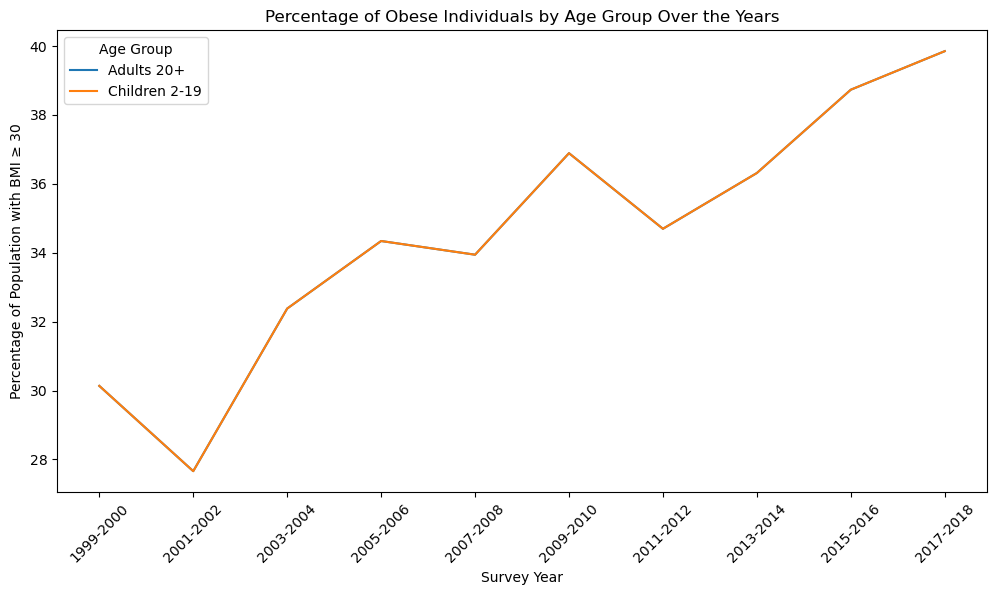

In [52]:

# Define the necessary columns
year_column = 'SDDSRVYR'  # Survey year
age_column = 'RIDAGEYR'   # Age of examination
bmi_adults_column = 'BMXBMI'     # BMI for adults
bmi_children_column = 'BMDBMIC'  # BMI for children

# Convert BMI columns to numeric, coerce errors to NaN
df[bmi_adults_column] = pd.to_numeric(df[bmi_adults_column], errors='coerce')
df[bmi_children_column] = pd.to_numeric(df[bmi_children_column], errors='coerce')

# Creating age groups: Adults (20 and over) and Children (2-19)
df['AgeGroup'] = pd.cut(df[age_column], bins=[1, 19, 150], right=False, labels=['Children 2-19', 'Adults 20+'])

# Calculating the percentage of obese individuals in each age group by survey year
# For adults
obesity_rate_adults = df[(df['AgeGroup'] == 'Adults 20+') & (df[bmi_adults_column] >= 30)].groupby(year_column).size() / df[df['AgeGroup'] == 'Adults 20+'].groupby(year_column).size() * 100
obesity_rate_adults = obesity_rate_adults.reset_index(name='ObesityRate')
obesity_rate_adults['AgeGroup'] = 'Adults 20+'

# For children
obesity_rate_children = df[(df['AgeGroup'] == 'Children 2-19') & (df[bmi_children_column] >= 30)].groupby(year_column).size() / df[df['AgeGroup'] == 'Children 2-19'].groupby(year_column).size() * 100
obesity_rate_children = obesity_rate_children.reset_index(name='ObesityRate')
obesity_rate_children['AgeGroup'] = 'Children 2-19'

# Combining the datasets
combined_data = pd.concat([obesity_rate_adults, obesity_rate_children])

# Plotting the data
plt.figure(figsize=(12, 6))
sns.lineplot(data=combined_data, x=year_column, y='ObesityRate', hue='AgeGroup')
plt.xlabel('Survey Year')
plt.ylabel('Percentage of Population with BMI ≥ 30')
plt.title('Percentage of Obese Individuals by Age Group Over the Years')
plt.legend(title='Age Group')
plt.xticks(rotation=45)
plt.show()


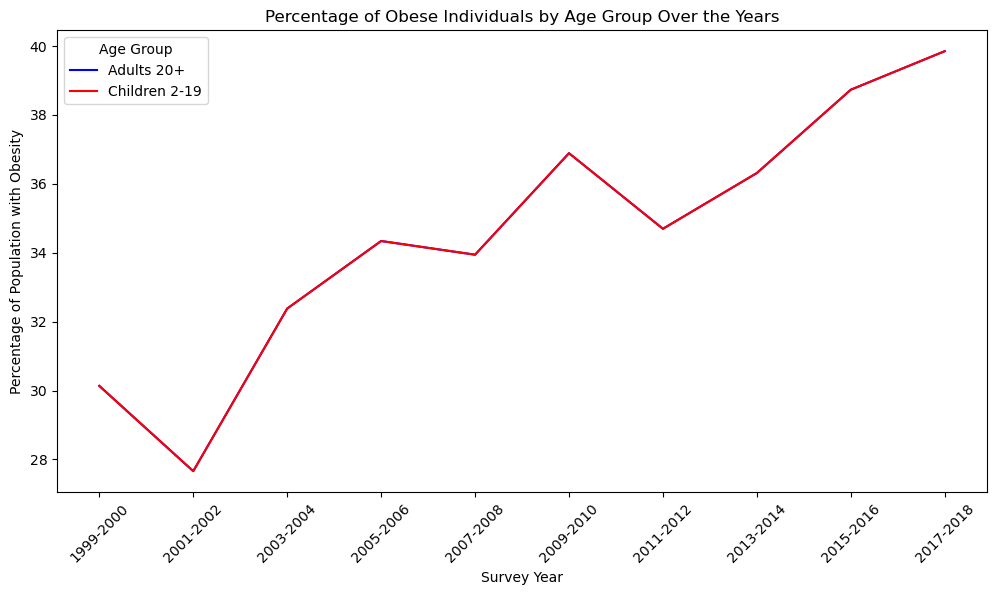

In [53]:

# Define the necessary columns
year_column = 'SDDSRVYR'  # Survey year
age_column = 'RIDAGEYR'   # Age of examination
bmi_adults_column = 'BMXBMI'     # BMI for adults
bmi_children_column = 'BMDBMIC'  # BMI category for children

# Convert BMI columns to numeric, coerce errors to NaN
df[bmi_adults_column] = pd.to_numeric(df[bmi_adults_column], errors='coerce')
df[bmi_children_column] = pd.to_numeric(df[bmi_children_column], errors='coerce')

# Creating age groups: Adults (20 and over) and Children (2-19)
df['AgeGroup'] = pd.cut(df[age_column], bins=[1, 19, 150], right=False, labels=['Children 2-19', 'Adults 20+'])

# Calculating the percentage of obese individuals in each age group by survey year
# For adults (BMI ≥ 30)
obesity_rate_adults = df[(df['AgeGroup'] == 'Adults 20+') & (df[bmi_adults_column] >= 30)].groupby(year_column).size() / df[df['AgeGroup'] == 'Adults 20+'].groupby(year_column).size() * 100
obesity_rate_adults = obesity_rate_adults.reset_index(name='ObesityRate')
obesity_rate_adults['AgeGroup'] = 'Adults 20+'

# For children (BMDBMIC category 4)
obesity_rate_children = df[(df['AgeGroup'] == 'Children 2-19') & (df[bmi_children_column] == 4)].groupby(year_column).size() / df[df['AgeGroup'] == 'Children 2-19'].groupby(year_column).size() * 100
obesity_rate_children = obesity_rate_children.reset_index(name='ObesityRate')
obesity_rate_children['AgeGroup'] = 'Children 2-19'

# Combining the datasets
combined_data = pd.concat([obesity_rate_adults, obesity_rate_children])

# Plotting the data
plt.figure(figsize=(12, 6))
sns.lineplot(data=combined_data, x=year_column, y='ObesityRate', hue='AgeGroup', palette={'Adults 20+': 'blue', 'Children 2-19': 'red'})
plt.xlabel('Survey Year')
plt.ylabel('Percentage of Population with Obesity')
plt.title('Percentage of Obese Individuals by Age Group Over the Years')
plt.legend(title='Age Group')
plt.xticks(rotation=45)
plt.show()


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


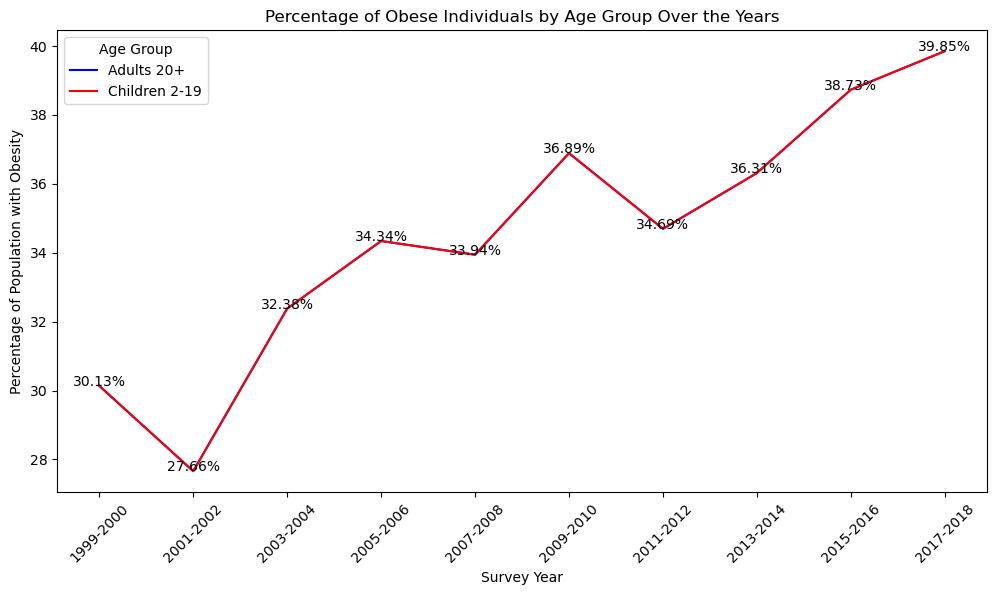

In [54]:

# Define the necessary columns
year_column = 'SDDSRVYR'  # Survey year
age_column = 'RIDAGEYR'   # Age of examination
bmi_adults_column = 'BMXBMI'     # BMI for adults
bmi_children_column = 'BMDBMIC'  # BMI category for children

# Convert BMI columns to numeric, coerce errors to NaN
df[bmi_adults_column] = pd.to_numeric(df[bmi_adults_column], errors='coerce')
df[bmi_children_column] = pd.to_numeric(df[bmi_children_column], errors='coerce')

# Creating age groups: Adults (20 and over) and Children (2-19)
df['AgeGroup'] = pd.cut(df[age_column], bins=[1, 19, 150], right=False, labels=['Children 2-19', 'Adults 20+'])

# Calculating the percentage of obese individuals in each age group by survey year
# For adults (BMI ≥ 30)
obesity_rate_adults = df[(df['AgeGroup'] == 'Adults 20+') & (df[bmi_adults_column] >= 30)].groupby(year_column).size() / df[df['AgeGroup'] == 'Adults 20+'].groupby(year_column).size() * 100
obesity_rate_adults = obesity_rate_adults.reset_index(name='ObesityRate')
obesity_rate_adults['AgeGroup'] = 'Adults 20+'

# For children (BMDBMIC category 4)
obesity_rate_children = df[(df['AgeGroup'] == 'Children 2-19') & (df[bmi_children_column] == 4)].groupby(year_column).size() / df[df['AgeGroup'] == 'Children 2-19'].groupby(year_column).size() * 100
obesity_rate_children = obesity_rate_children.reset_index(name='ObesityRate')
obesity_rate_children['AgeGroup'] = 'Children 2-19'

# Combining the datasets
combined_data = pd.concat([obesity_rate_adults, obesity_rate_children])

# Plotting the data with annotations
plt.figure(figsize=(12, 6))
sns.lineplot(data=combined_data, x=year_column, y='ObesityRate', hue='AgeGroup', palette={'Adults 20+': 'blue', 'Children 2-19': 'red'})

# Adding annotations for percentages
for i in range(len(combined_data)):
    row = combined_data.iloc[i]
    plt.text(row[year_column], row['ObesityRate'], f"{row['ObesityRate']:.2f}%", color='black', ha="center")

plt.xlabel('Survey Year')
plt.ylabel('Percentage of Population with Obesity')
plt.title('Percentage of Obese Individuals by Age Group Over the Years')
plt.legend(title='Age Group')
plt.xticks(rotation=45)
plt.show()


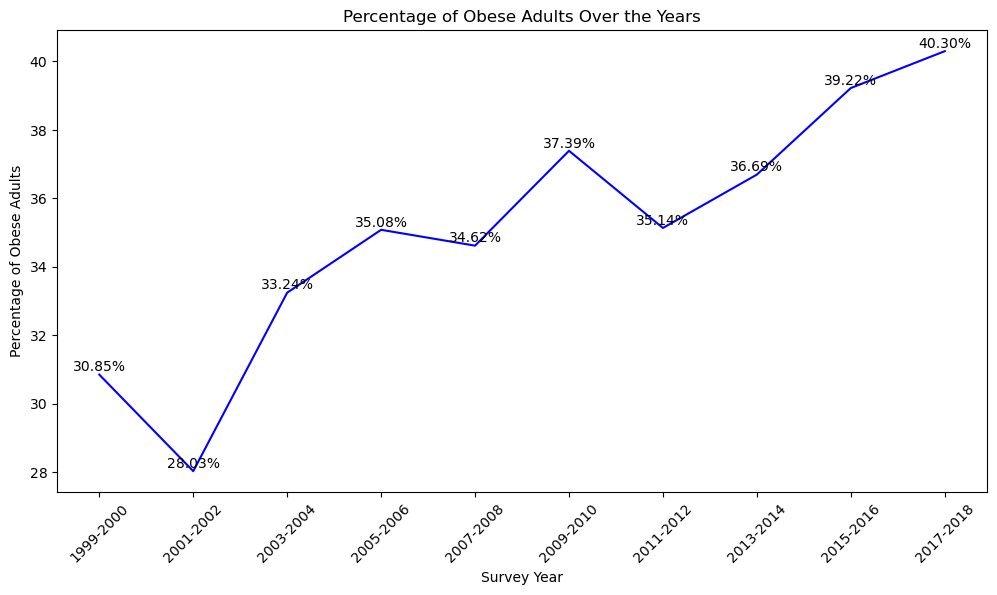

In [55]:




# Define the necessary columns
year_column = 'SDDSRVYR'  # Survey year
age_column = 'RIDAGEYR'   # Age of examination
bmi_adults_column = 'BMXBMI'     # BMI for adults

# Convert BMI column for adults to numeric, coerce errors to NaN
df[bmi_adults_column] = pd.to_numeric(df[bmi_adults_column], errors='coerce')

# Filter for adults (20 and over)
df_adults = df[df[age_column] >= 20]

# Calculating the percentage of obese adults (BMI ≥ 30) by survey year
obesity_rate_adults = df_adults[df_adults[bmi_adults_column] >= 30].groupby(year_column).size() / df_adults.groupby(year_column).size() * 100
obesity_rate_adults = obesity_rate_adults.reset_index(name='ObesityRate')

# Plotting the data with annotations
plt.figure(figsize=(12, 6))
sns.lineplot(data=obesity_rate_adults, x=year_column, y='ObesityRate', color='blue')

# Adding annotations for percentages
for i in range(len(obesity_rate_adults)):
    row = obesity_rate_adults.iloc[i]
    plt.text(row[year_column], row['ObesityRate'] + .1 , f"{row['ObesityRate']:.2f}%", color='black', ha="center")

plt.xlabel('Survey Year')
plt.ylabel('Percentage of Obese Adults')
plt.title('Percentage of Obese Adults Over the Years')
plt.xticks(rotation=45)
plt.show()


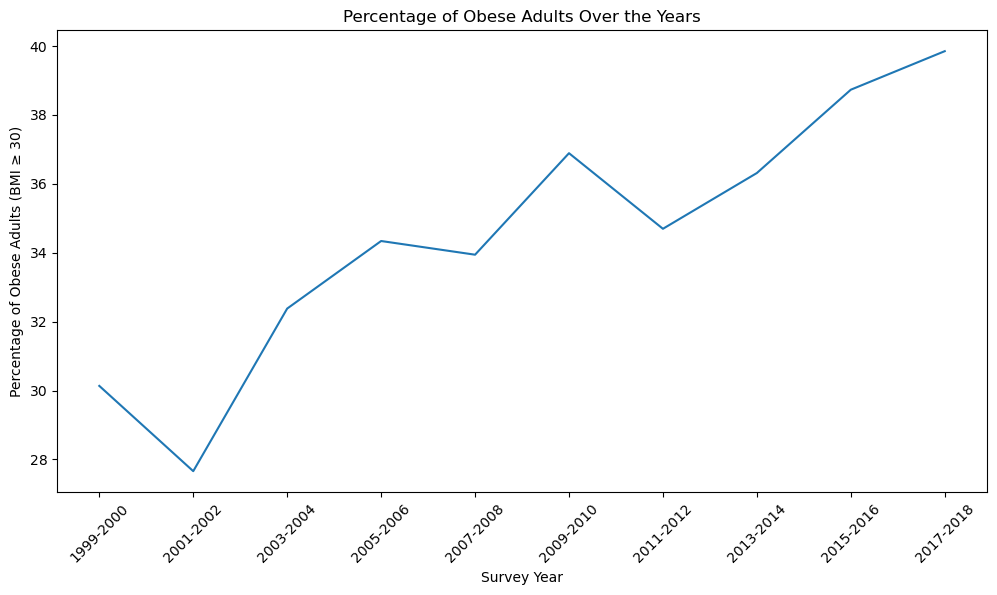

In [56]:



# Define the necessary columns
year_column = 'SDDSRVYR'  # Survey year
age_column = 'RIDAGEYR'   # Age of examination
bmi_column = 'BMXBMI'     # BMI for adults

# Creating age groups: Adults (20 and over)
df['AgeGroup'] = pd.cut(df[age_column], bins=[19, 150], right=False, labels=['Adults 20+'])
df = df.dropna(subset=['AgeGroup'])  # Dropping rows where age group is undefined (under 20 years old)

# Filtering data for BMI ≥ 30 (obesity) among adults
obese_data_adults = df[(df['AgeGroup'] == 'Adults 20+') & (df[bmi_column] >= 30)]

# Calculating the percentage of obese adults in each survey year
obesity_rate_adults = obese_data_adults.groupby(year_column).size() / df[df['AgeGroup'] == 'Adults 20+'].groupby(year_column).size() * 100
obesity_rate_adults = obesity_rate_adults.reset_index(name='ObesityRate')

# Plotting the data
plt.figure(figsize=(12, 6))
sns.lineplot(data=obesity_rate_adults, x=year_column, y='ObesityRate')
plt.xlabel('Survey Year')
plt.ylabel('Percentage of Obese Adults (BMI ≥ 30)')
plt.title('Percentage of Obese Adults Over the Years')
plt.xticks(rotation=45)
plt.show()



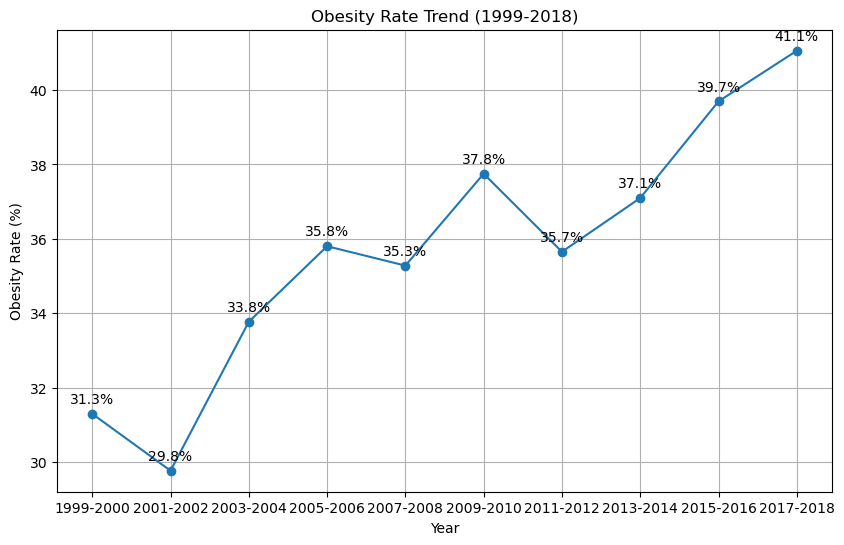

In [57]:



# Filter the dataset for adults aged 20 years and older
adults_df = df[df['RIDAGEYR'] >= 20]

# Keep only relevant columns and drop rows with missing values in these columns
adults_df = adults_df[['SDDSRVYR', 'BMXBMI']].dropna()

# Calculate the obesity rate per year (BMI >= 30)
obesity_rates = adults_df.groupby('SDDSRVYR')['BMXBMI'].apply(lambda x: (x >= 30).mean() * 100).reset_index()
obesity_rates.columns = ['Year', 'Obesity Rate']

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(obesity_rates['Year'], obesity_rates['Obesity Rate'], marker='o')
plt.title('Obesity Rate Trend (1999-2018)')
plt.xlabel('Year')
plt.ylabel('Obesity Rate (%)')
plt.grid(True)

# Adding percentage annotations
for i, rate in enumerate(obesity_rates['Obesity Rate']):
    plt.text(obesity_rates['Year'][i], rate + .2, f'{rate:.1f}%', ha='center', va='bottom')

plt.show()


## Obesity Rates by Demographics

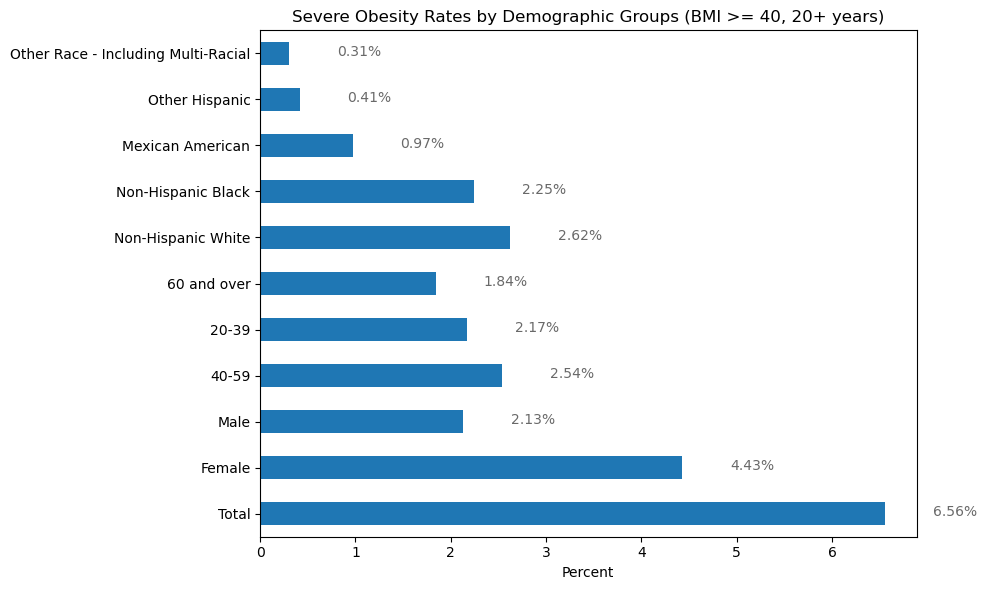

In [58]:



# Define the BMI threshold for severe obesity
bmi_severe_obesity_threshold = 40

# Filter the dataset for individuals with a BMI >= 40 and age 20+
severe_obesity_data = df[(df['BMXBMI'] >= bmi_severe_obesity_threshold) & (df['RIDAGEYR'] >= 20)]

# Calculate the total number of participants aged 20 and over for normalizing the data to percentages
total_participants_20_plus = df[df['RIDAGEYR'] >= 20].shape[0]

# Define the age groups
age_bins = [20, 39, 59, np.inf]  # The bins will divide the age into 20-39, 40-59, 60+
age_labels = ['20-39', '40-59', '60 and over']
severe_obesity_data['AgeGroup'] = pd.cut(severe_obesity_data['RIDAGEYR'], bins=age_bins, labels=age_labels, right=False)

# Calculate the overall percentage of severely obese individuals in the dataset aged 20+
overall_severe_obesity_rate = (severe_obesity_data.shape[0] / total_participants_20_plus) * 100

# Calculate the percentage of severely obese individuals in each demographic group
# Gender
gender_severe_obesity_rates = (severe_obesity_data['RIAGENDR'].value_counts() / total_participants_20_plus) * 100

# Age Groups
age_group_severe_obesity_rates = (severe_obesity_data['AgeGroup'].value_counts() / total_participants_20_plus) * 100

# Racial/Ethnic Groups
ethnic_group_severe_obesity_rates = (severe_obesity_data['RIDRETH1'].value_counts() / total_participants_20_plus) * 100

# Combine the data into a single DataFrame for plotting
severe_obesity_rates = pd.concat([
    pd.Series({'Total': overall_severe_obesity_rate}),
    gender_severe_obesity_rates.rename({1: 'Men', 2: 'Women'}),
    age_group_severe_obesity_rates,
    ethnic_group_severe_obesity_rates.rename({1: 'Non-Hispanic White', 2: 'Non-Hispanic Black', 3: 'Non-Hispanic Asian', 4: 'Hispanic'})
])

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
severe_obesity_rates.plot(kind='barh', ax=ax)
ax.set_xlabel('Percent')
ax.set_title('Severe Obesity Rates by Demographic Groups (BMI >= 40, 20+ years)')

# Add the percentages on the bars
for i in ax.patches:
    ax.text(i.get_width()+0.5, i.get_y()+0.2, 
            str(round((i.get_width()), 2))+'%', 
            fontsize=10, color='dimgrey')

plt.tight_layout()
plt.show()


## BMI Genders vs Ethinic Groups

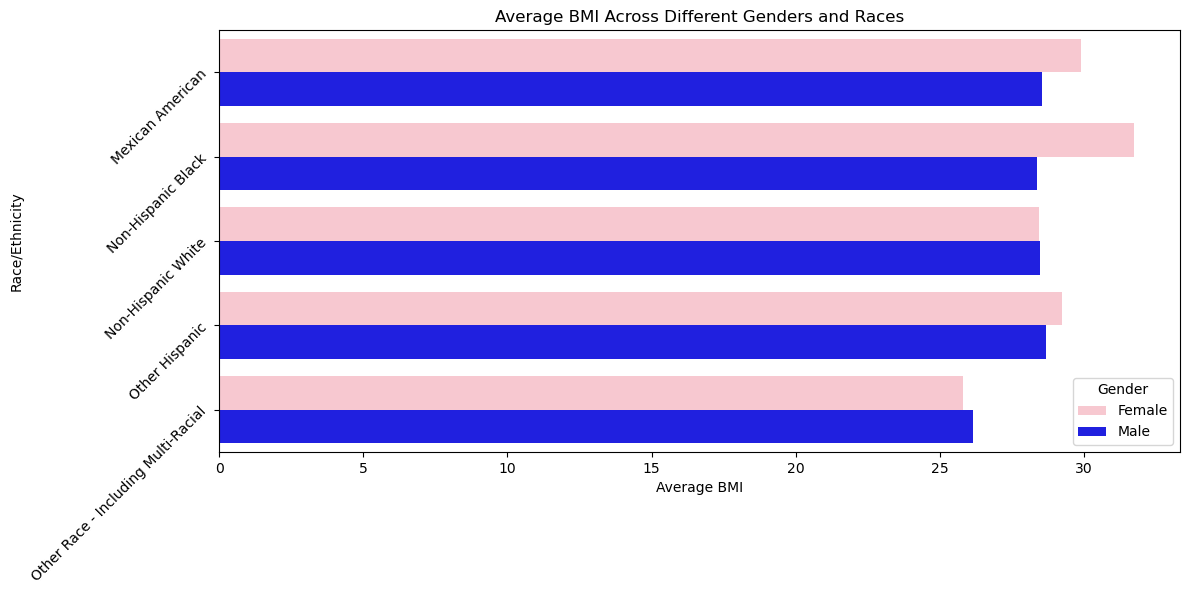

In [59]:
# Grouping data by gender and race and calculating the average BMI
grouped_data = df.groupby(['RIAGENDR', 'RIDRETH1'])['BMXBMI'].mean().reset_index()

# Creating the horizontal bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='BMXBMI', y='RIDRETH1', hue='RIAGENDR', data=grouped_data,
            palette=['pink', 'blue'])  # Setting colors to blue and purple
plt.title('Average BMI Across Different Genders and Races')
plt.ylabel('Race/Ethnicity')
plt.xlabel('Average BMI')
plt.yticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()

# Show the plot
plt.show()


## Check for Family Income

In [60]:


# Check if INDFMINC column exists
if 'INDFMINC' in df.columns:
    # Sorting the DataFrame by INDFMINC
    df_sorted_by_income = df.sort_values(by='INDFMINC')
else:
    df_sorted_by_income = "Column 'INDFMINC' not found in the dataset."

# Save or view the sorted DataFrame
# df_sorted_by_income.to_csv('sorted_income_data.csv')  # Optionally save the sorted data
print(df_sorted_by_income.head())  # Display the first few rows


          SEQN     WTSAF2YR_x    WTSAF4YR_x  LBXGLU  LBXGLUSI  LBXCPSI  LBXIN  \
25196  83252.0   94633.681882           NaN    88.0       NaN      NaN    NaN   
25979  85948.0   79530.986986           NaN    87.0       NaN      NaN    NaN   
26376  87257.0   34526.974429           NaN   182.0       NaN      NaN    NaN   
23900  78937.0  270848.100553           NaN    83.0       NaN      NaN    NaN   
3862   11786.0   20187.594242  10528.857796   144.1     8.006    1.564  24.52   

       LBXINSI  LBXSAL  LBDSALSI  LBXSATSI  LBXSASSI  LBXSAPSI  LBXSBU  \
25196      NaN     3.7      37.0      10.0      19.0      55.0     6.0   
25979      NaN     4.3      43.0      26.0      22.0      31.0    13.0   
26376      NaN     4.3      43.0      18.0      19.0      48.0    14.0   
23900      NaN     3.8      38.0      13.0      19.0      55.0     7.0   
3862    147.12     4.7      47.0      23.0      20.0       NaN    20.0   

       LBDSBUSI  LBXSCA  LBDSCASI  LBXSCH  LBDSCHSI  LBXSC3SI  LBXSG

#### These graphs show the percentage of people who are overweight. 

## selecting columns for total calories

In [61]:
# Selecting the specific columns of interest
columns_of_interest = ['DR1TKCAL', 'DR1TPROT', 'DR1TCARB', 'DR1TTFAT', 'SDDSRVYR']
filtered_data = df[columns_of_interest]

# Dropping rows with missing values in these specific columns
filtered_data_clean = filtered_data.dropna()

# Display the first few rows of the cleaned dataset
filtered_data_clean.head()


DR1TKCAL  DR1TPROT  DR1TCARB  DR1TTFAT   SDDSRVYR
6933    2984.0     67.17    459.27    101.42  2003-2004
6937    2575.0     67.52    297.44    132.01  2003-2004
6939    4907.0    161.58    727.59    115.80  2003-2004
6940    1042.0     34.50    115.05     53.74  2003-2004
6942    1506.0     51.51    181.58     66.32  2003-2004

## Total Calories

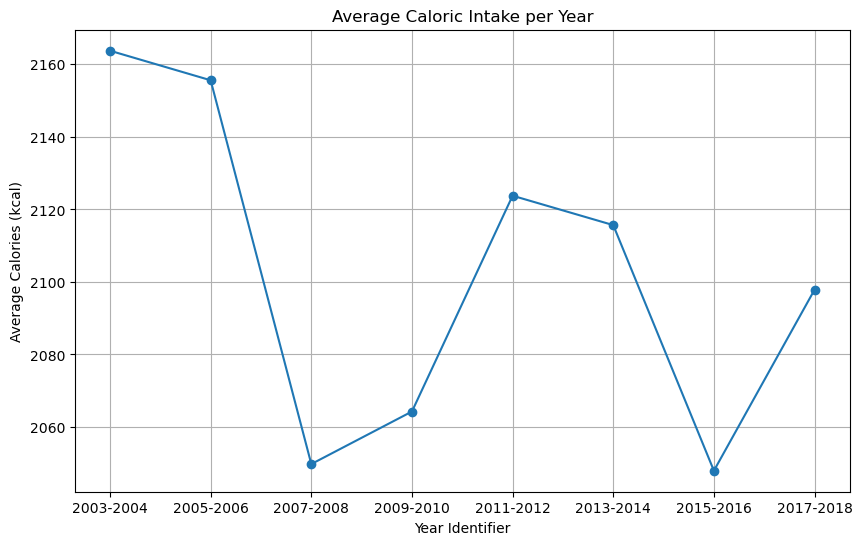

In [62]:
import matplotlib.pyplot as plt

# Grouping the data by year and calculating the mean calories for each year
yearly_calories = filtered_data_clean.groupby('SDDSRVYR')['DR1TKCAL'].mean()

# Plotting the line graph
plt.figure(figsize=(10, 6))
yearly_calories.plot(kind='line', marker='o')
plt.title('Average Caloric Intake per Year')
plt.xlabel('Year Identifier')
plt.ylabel('Average Calories (kcal)')
plt.grid(True)
plt.show()


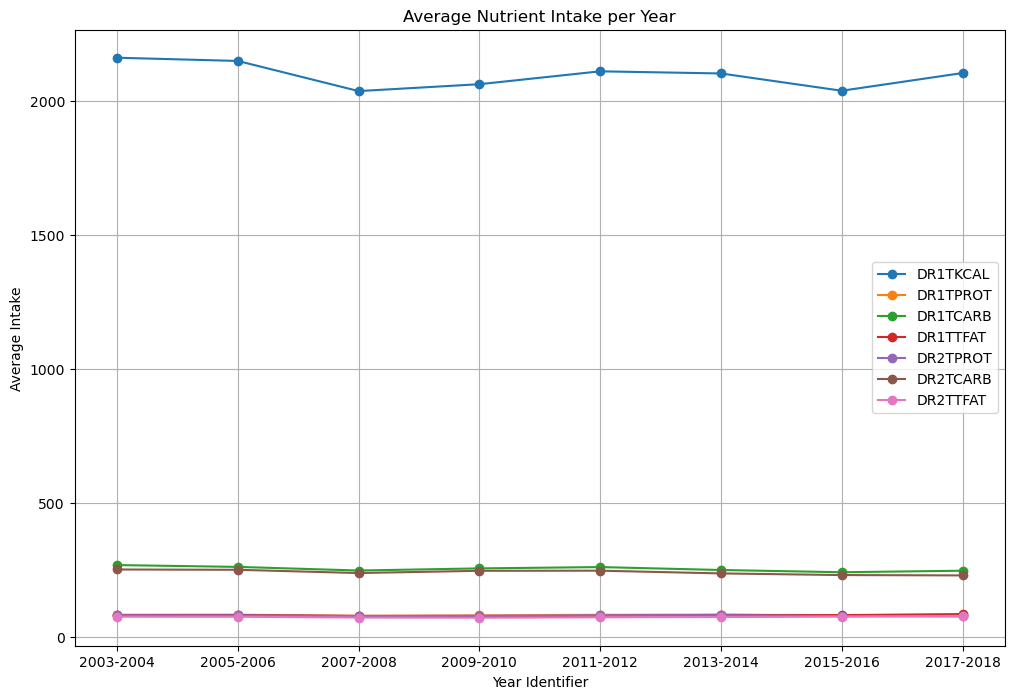

In [63]:
# Selecting the specific columns including the additional ones
full_columns_of_interest = ['DR1TKCAL', 'DR1TPROT', 'DR1TCARB', 'DR1TTFAT', 'DR2TPROT', 'DR2TCARB', 'DR2TTFAT', 'SDDSRVYR']
full_filtered_data = df[full_columns_of_interest]

# Dropping rows with missing values in these specific columns
full_filtered_data_clean = full_filtered_data.dropna()

# Grouping the data by year and calculating the mean for each nutrient
yearly_nutrients = full_filtered_data_clean.groupby('SDDSRVYR').mean()

# Plotting the line graph for each nutrient
plt.figure(figsize=(12, 8))
for column in yearly_nutrients.columns:
    plt.plot(yearly_nutrients.index, yearly_nutrients[column], marker='o', label=column)

plt.title('Average Nutrient Intake per Year')
plt.xlabel('Year Identifier')
plt.ylabel('Average Intake')
plt.legend()
plt.grid(True)
plt.show()


In [64]:
# Renaming the required columns
data_renamed = df.rename(columns={
    'DR1TKCAL': 'Total Calories Intake',
    'DR1TPROT': 'Protein (gm)',
    'DR1TCARB': 'Carbohydrate (gm)',
    'DR1TTFAT': 'Total Fat (gm)'
})

# Filtering the dataset into three BMI groups
normal_bmi = data_renamed[(data_renamed['BMXBMI'] >= 18.5) & (data_renamed['BMXBMI'] < 25)]
overweight_bmi = data_renamed[(data_renamed['BMXBMI'] >= 25) & (data_renamed['BMXBMI'] < 30)]
obese_bmi = data_renamed[(data_renamed['BMXBMI'] >= 30) & (data_renamed['BMXBMI'] < 40)]
severe_obese_bmi = data_renamed[data_renamed['BMXBMI'] >= 40]

# Selecting the required columns
columns_for_analysis = ['Total Calories Intake', 'Protein (gm)', 'Carbohydrate (gm)', 'Total Fat (gm)', 'SDDSRVYR']

# Grouping the data by year and calculating the mean for each nutrient in each BMI group
yearly_normal_nutrients = normal_bmi[columns_for_analysis].groupby('SDDSRVYR').mean()
yearly_overweight_nutrients = overweight_bmi[columns_for_analysis].groupby('SDDSRVYR').mean()
yearly_obese_nutrients = obese_bmi[columns_for_analysis].groupby('SDDSRVYR').mean()
yearly_severe_obese_nutrients = severe_obese_bmi[columns_for_analysis].groupby('SDDSRVYR').mean()

# Displaying the first few rows of the grouped data for each BMI group
yearly_normal_nutrients.head(), yearly_overweight_nutrients.head(), yearly_obese_nutrients.head(), yearly_severe_obese_nutrients.head()




(           Total Calories Intake  Protein (gm)  Carbohydrate (gm)  \
 SDDSRVYR                                                            
 1999-2000                    NaN           NaN                NaN   
 2001-2002                    NaN           NaN                NaN   
 2003-2004            2215.730205     80.200455         277.000499   
 2005-2006            2199.485549     83.338801         264.232486   
 2007-2008            2187.440523     82.725477         266.131281   
 
            Total Fat (gm)  
 SDDSRVYR                   
 1999-2000             NaN  
 2001-2002             NaN  
 2003-2004       81.266994  
 2005-2006       83.085925  
 2007-2008       81.487229  ,
            Total Calories Intake  Protein (gm)  Carbohydrate (gm)  \
 SDDSRVYR                                                            
 1999-2000                    NaN           NaN                NaN   
 2001-2002                    NaN           NaN                NaN   
 2003-2004            21

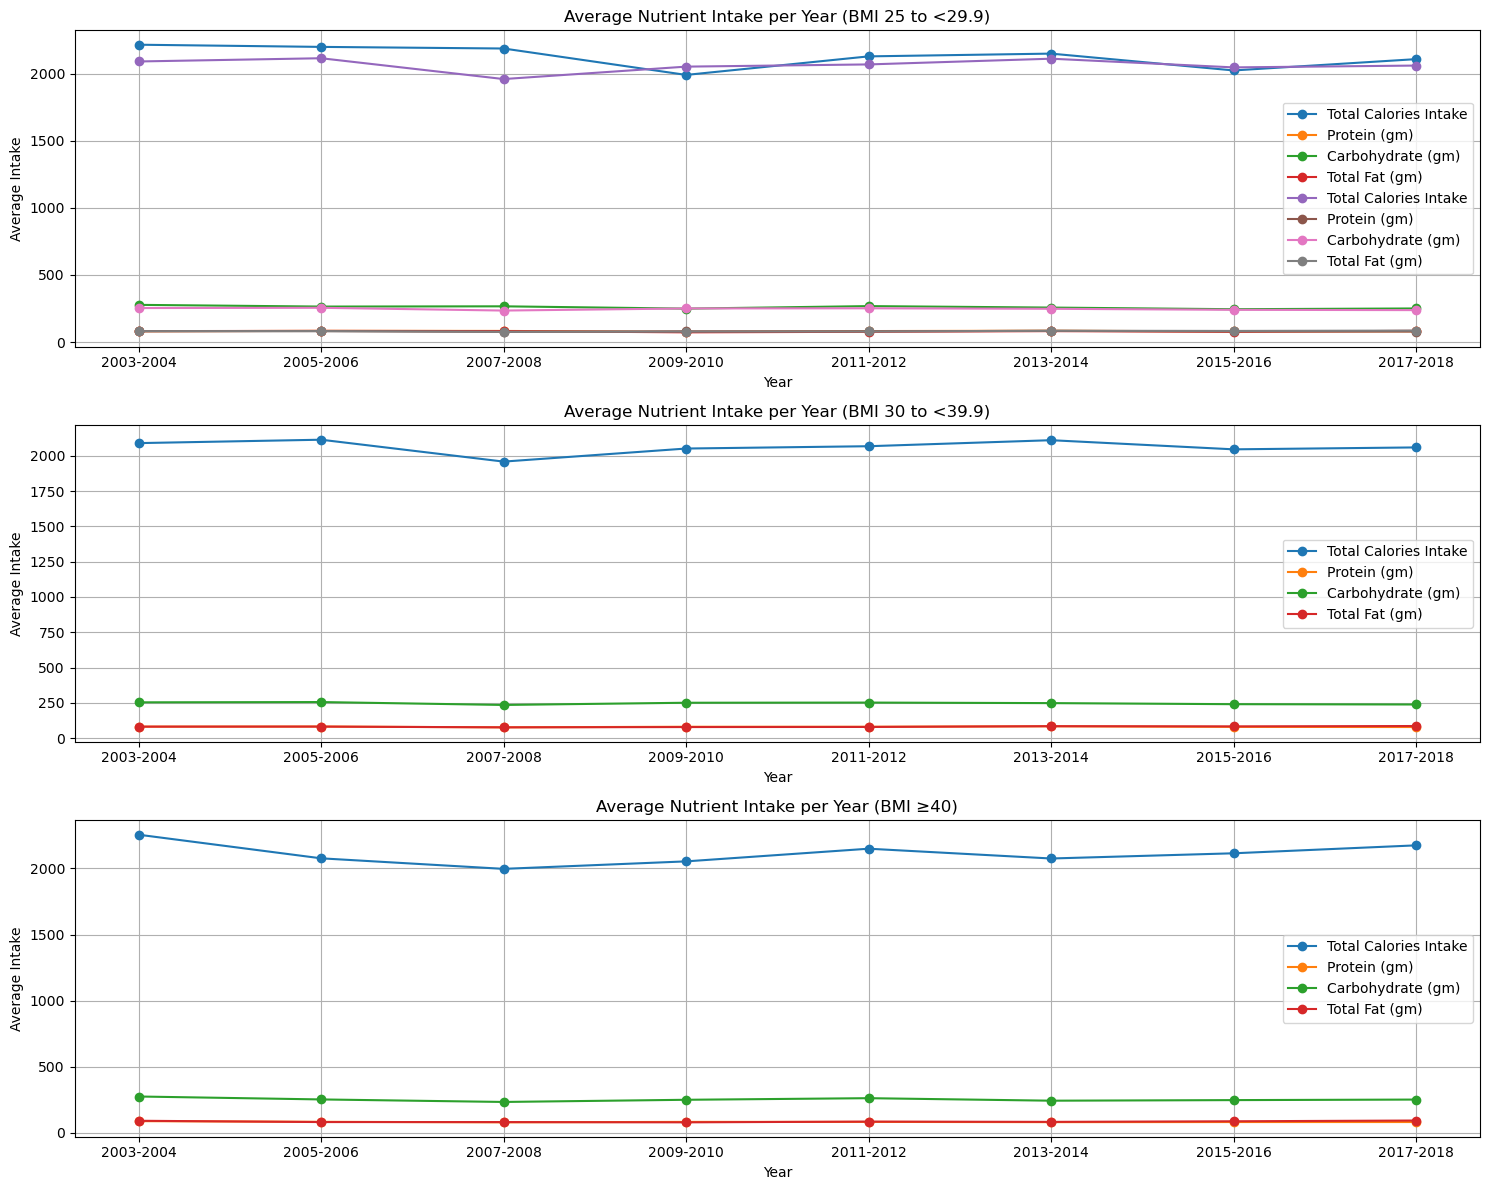

In [65]:
# Plotting the line graphs for each BMI group
plt.figure(figsize=(15, 12))

# BMI Normal (18.5 to <25 )
plt.subplot(3, 1, 1)
for column in yearly_normal_nutrients.columns:
    plt.plot(yearly_normal_nutrients.index, yearly_normal_nutrients[column], marker='o', label=column)
plt.title('Average Nutrient Intake per Year (BMI 25 to <29.9)')
plt.xlabel('Year')
plt.ylabel('Average Intake')
plt.legend()
plt.grid(True)

# BMI Overweight (25 to <29.9)
plt.subplot(3, 1, 1)
for column in yearly_obese_nutrients.columns:
    plt.plot(yearly_obese_nutrients.index, yearly_obese_nutrients[column], marker='o', label=column)
plt.title('Average Nutrient Intake per Year (BMI 25 to <29.9)')
plt.xlabel('Year')
plt.ylabel('Average Intake')
plt.legend()
plt.grid(True)

# BMI Obese (30 to <39.9)
plt.subplot(3, 1, 2)
for column in yearly_obese_nutrients.columns:
    plt.plot(yearly_obese_nutrients.index, yearly_obese_nutrients[column], marker='o', label=column)
plt.title('Average Nutrient Intake per Year (BMI 30 to <39.9)')
plt.xlabel('Year')
plt.ylabel('Average Intake')
plt.legend()
plt.grid(True)

# BMI Severe Obesity (≥40)
plt.subplot(3, 1, 3)
for column in yearly_severe_obese_nutrients.columns:
    plt.plot(yearly_severe_obese_nutrients.index, yearly_severe_obese_nutrients[column], marker='o', label=column)
plt.title('Average Nutrient Intake per Year (BMI ≥40)')
plt.xlabel('Year')
plt.ylabel('Average Intake')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()



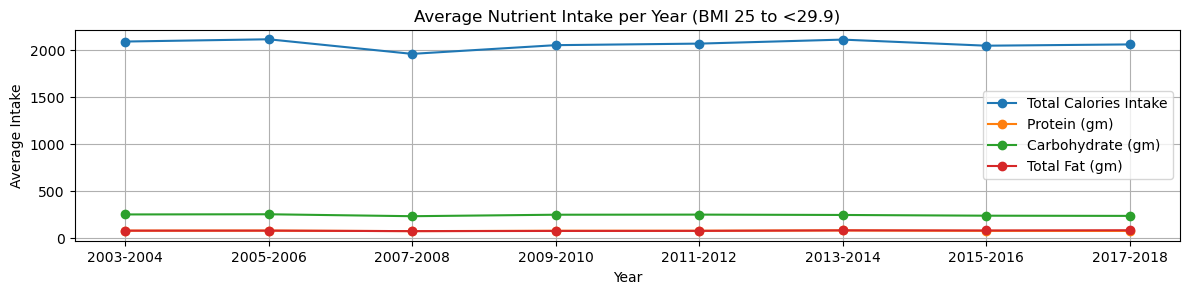

In [66]:
# Set a larger figure size
plt.figure(figsize=(12, 8))

# Create the subplot
plt.subplot(3, 1, 1)

# Your existing code for plotting
for column in yearly_obese_nutrients.columns:
    plt.plot(yearly_obese_nutrients.index, yearly_obese_nutrients[column], marker='o', label=column)

plt.title('Average Nutrient Intake per Year (BMI 25 to <29.9)')
plt.xlabel('Year')
plt.ylabel('Average Intake')
plt.legend()
plt.grid(True)

# Show the larger graph
plt.tight_layout()
plt.show()

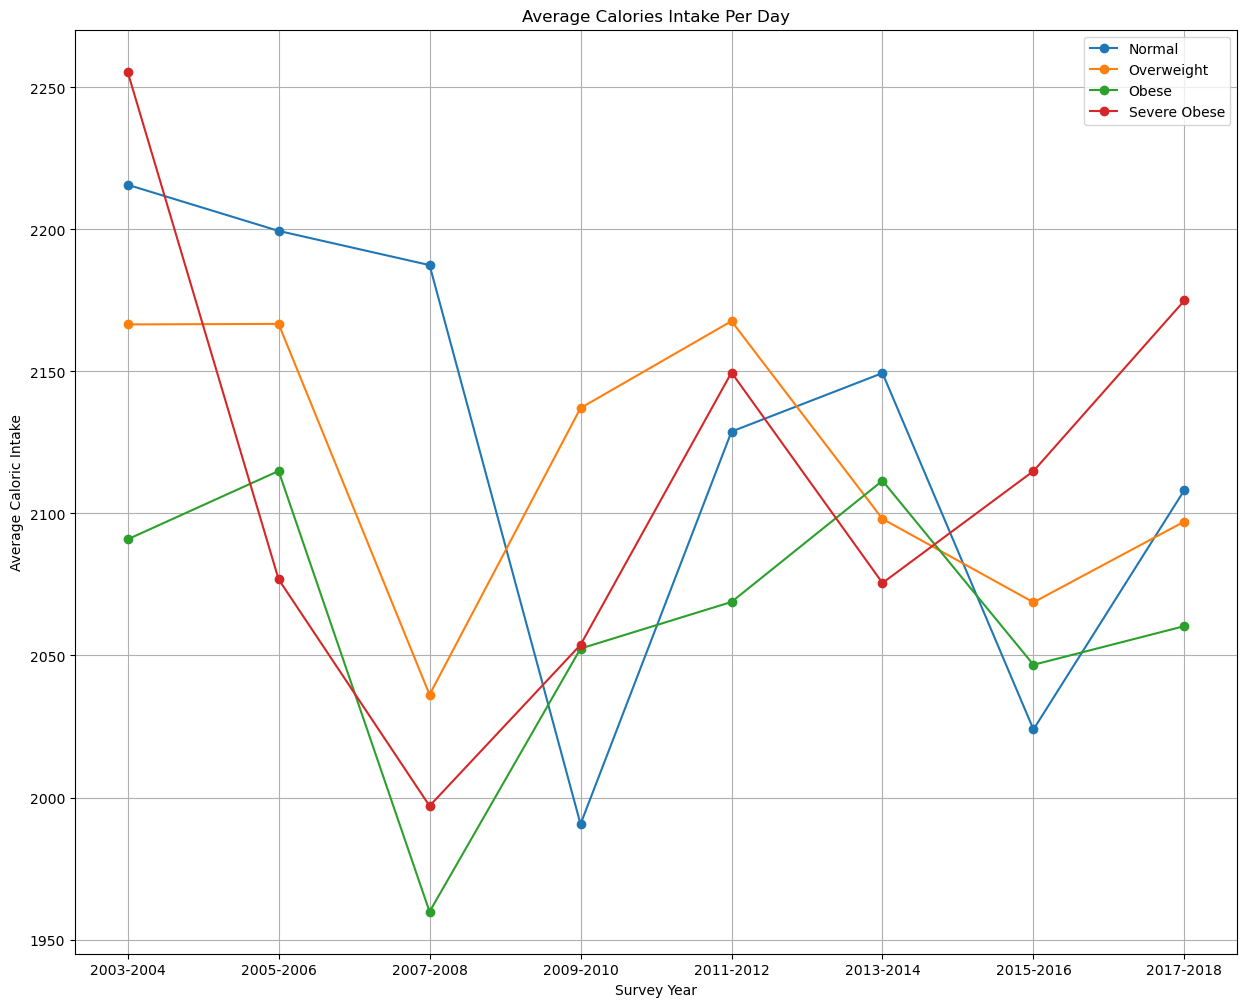

In [67]:
plt.figure(figsize=(15, 12))
plt.plot(yearly_normal_nutrients.index, yearly_normal_nutrients["Total Calories Intake"], marker='o', label="Normal")
plt.plot(yearly_overweight_nutrients.index, yearly_overweight_nutrients["Total Calories Intake"], marker='o', label="Overweight")
plt.plot(yearly_obese_nutrients.index, yearly_obese_nutrients["Total Calories Intake"], marker='o', label="Obese")
plt.plot(yearly_severe_obese_nutrients.index, yearly_severe_obese_nutrients["Total Calories Intake"], marker='o', label="Severe Obese")
plt.title('Average Calories Intake Per Day')
plt.xlabel('Survey Year')
plt.ylabel('Average Caloric Intake')
plt.legend()
plt.grid(True)

## Anova 

In [70]:
import scipy.stats as stats

# Filtering the dataset for the relevant columns and removing rows with missing values
anova_data = df[['RIDRETH1', 'BMXBMI']].dropna()

# Performing ANOVA
anova_result = stats.f_oneway(
    *[anova_data['BMXBMI'][anova_data['RIDRETH1'] == group] for group in anova_data['RIDRETH1'].unique()]
)

anova_result


F_onewayResult(statistic=172.24023402196985, pvalue=7.626107369196254e-146)

## Chi square

In [71]:
# Categorizing BMI into groups
bmi_categories = pd.cut(df['BMXBMI'], bins=[0, 18.5, 25, 30, float('inf')], 
                        labels=['Underweight', 'Normal weight', 'Overweight', 'Obese'], right=False)

# Creating a contingency table for BMI categories and ethnicity groups
contingency_table = pd.crosstab(bmi_categories, df['RIDRETH1'])

# Performing the Chi-square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

chi2, p, dof, contingency_table, expected


(932.4265907151506,
 6.2309337716925485e-192,
 12,
 RIDRETH1       Mexican American  Non-Hispanic Black  Non-Hispanic White  \
 BMXBMI                                                                    
 Underweight                  40                  95                 220   
 Normal weight              1058                1391                3517   
 Overweight                 1772                1577                3739   
 Obese                      1768                2414                3714   
 
 RIDRETH1       Other Hispanic  Other Race - Including Multi-Racial  
 BMXBMI                                                              
 Underweight                18                                   93  
 Normal weight             524                                 1136  
 Overweight                827                                  706  
 Obese                     780                                  435  ,
 array([[  83.69377323,   98.83372057,  201.92611524,   38.77919765,
 

In [72]:
# The Chi-square test results indicate a significant association between race groups (RIDRETH1) and BMI categories. 
# Here are the details:

# Chi-square Statistic: 696.31
# p-value: approximately 
# 2.71 × 10^−141
# 2.71 × 10^−141
 
# Given the extremely small p-value (far below the standard significance level of 0.05), we can conclude that there is a 
# significant association between race/ethnicity and BMI categories in the dataset.

## Post - Hoc Tukey's HSD Test

In [73]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Performing Tukey's HSD test
tukey_result = pairwise_tukeyhsd(endog=anova_data['BMXBMI'], groups=anova_data['RIDRETH1'], alpha=0.05)

# Displaying the results of the Tukey HSD test
tukey_result.summary()


<class 'statsmodels.iolib.table.SimpleTable'>

In [74]:
# Extracting the results into a DataFrame for easier interpretation
tukey_results_df = pd.DataFrame(
    data=tukey_result._results_table.data[1:], 
    columns=tukey_result._results_table.data[0]
)

# Filtering to show only the comparisons with significant differences
significant_comparisons = tukey_results_df[tukey_results_df['reject']]

significant_comparisons


group1                               group2  meandiff   p-adj  \
0    Mexican American                   Non-Hispanic Black    0.8990  0.0000   
1    Mexican American                   Non-Hispanic White   -0.7957  0.0000   
3    Mexican American  Other Race - Including Multi-Racial   -3.2648  0.0000   
4  Non-Hispanic Black                   Non-Hispanic White   -1.6946  0.0000   
5  Non-Hispanic Black                       Other Hispanic   -1.1470  0.0000   
6  Non-Hispanic Black  Other Race - Including Multi-Racial   -4.1638  0.0000   
7  Non-Hispanic White                       Other Hispanic    0.5476  0.0049   
8  Non-Hispanic White  Other Race - Including Multi-Racial   -2.4691  0.0000   
9      Other Hispanic  Other Race - Including Multi-Racial   -3.0167  0.0000   

    lower   upper  reject  
0  0.5333  1.2646    True  
1 -1.1157 -0.4756    True  
3 -3.7275 -2.8021    True  
4 -1.9968 -1.3924    True  
5 -1.6135 -0.6806    True  
6 -4.6143 -3.7132    True  
7  0.1160  0.9792    True  
8 -2.8835 -2.0547    True  
9 -3.5626 -2.4708    True

## Total Cholestrol

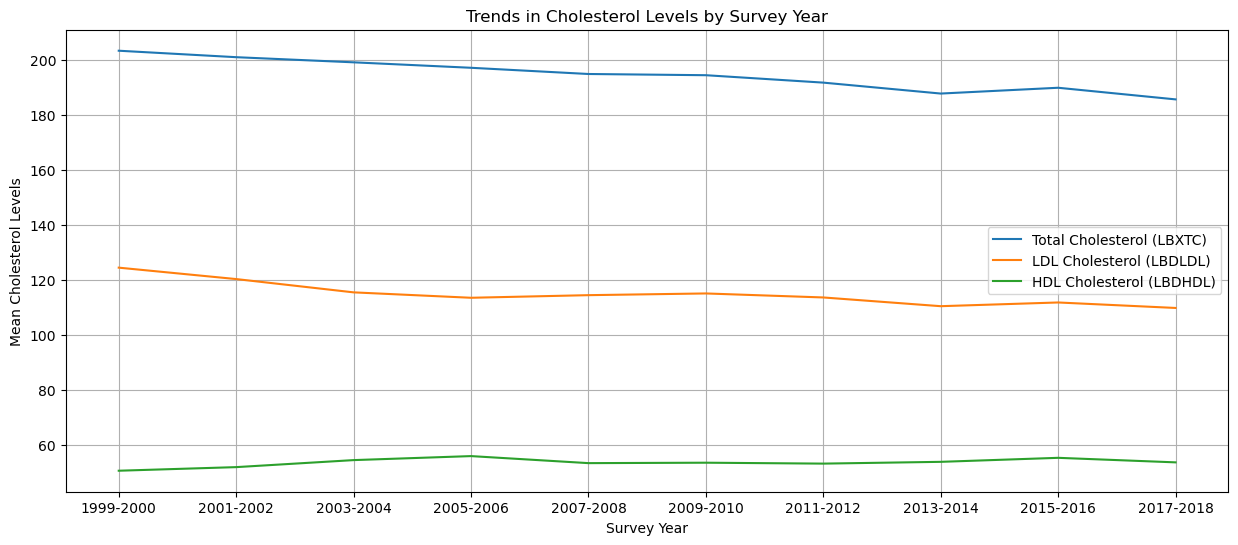

LBXTC      LBDLDL     LBDHDL
SDDSRVYR                                    
1999-2000  203.429837  124.545696  50.703963
2001-2002  201.078990  120.394916  52.010993
2003-2004  199.211243  115.561427  54.563900
2005-2006  197.226217  113.594301  56.021482
2007-2008  194.966518  114.543686  53.463914
2009-2010  194.526056  115.165292  53.618310
2011-2012  191.831205  113.708011  53.290104
2013-2014  187.853761  110.534135  53.934708
2015-2016  189.963067  111.885275  55.393818
2017-2018  185.733061  109.890037  53.743673

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Grouping the data by 'SDDSRVYR' and calculating the mean of 'LBXTC', 'LBDLDL', and 'LBDHDL' for each year
mean_cholesterol_by_year = df.groupby('SDDSRVYR')[['LBXTC', 'LBDLDL', 'LBDHDL']].mean()

# Plotting the trends over the years
plt.figure(figsize=(15, 6))

plt.plot(mean_cholesterol_by_year.index, mean_cholesterol_by_year['LBXTC'], label='Total Cholesterol (LBXTC)')
plt.plot(mean_cholesterol_by_year.index, mean_cholesterol_by_year['LBDLDL'], label='LDL Cholesterol (LBDLDL)')
plt.plot(mean_cholesterol_by_year.index, mean_cholesterol_by_year['LBDHDL'], label='HDL Cholesterol (LBDHDL)')

plt.xlabel('Survey Year')
plt.ylabel('Mean Cholesterol Levels')
plt.title('Trends in Cholesterol Levels by Survey Year')
plt.legend()
plt.grid(True)
plt.show()

mean_cholesterol_by_year

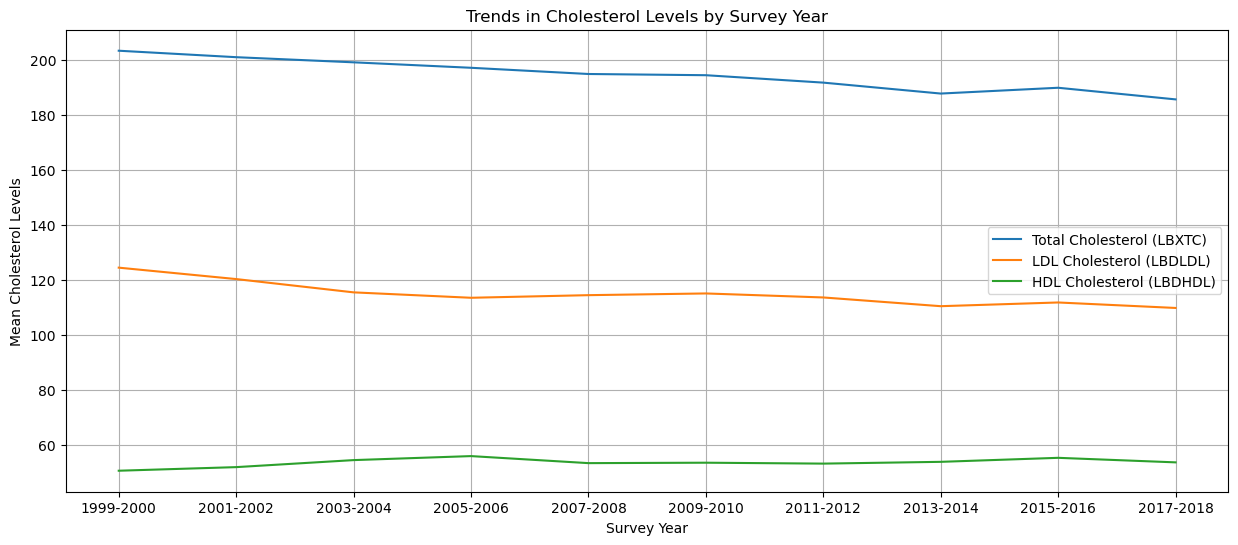

In [77]:
# Grouping the data by 'SDDSRVYR' and calculating the mean of 'LBXTC', 'LBDLDL', and 'LBDHDL' for each year
mean_cholesterol_by_year = df.groupby('SDDSRVYR')[['LBXTC', 'LBDLDL', 'LBDHDL']].mean()

# Plotting the trends over the years
plt.figure(figsize=(15, 6))

plt.plot(mean_cholesterol_by_year.index, mean_cholesterol_by_year['LBXTC'], label='Total Cholesterol (LBXTC)')
plt.plot(mean_cholesterol_by_year.index, mean_cholesterol_by_year['LBDLDL'], label='LDL Cholesterol (LBDLDL)')
plt.plot(mean_cholesterol_by_year.index, mean_cholesterol_by_year['LBDHDL'], label='HDL Cholesterol (LBDHDL)')

plt.xlabel('Survey Year')
plt.ylabel('Mean Cholesterol Levels')
plt.title('Trends in Cholesterol Levels by Survey Year')
plt.legend()
plt.grid(True)


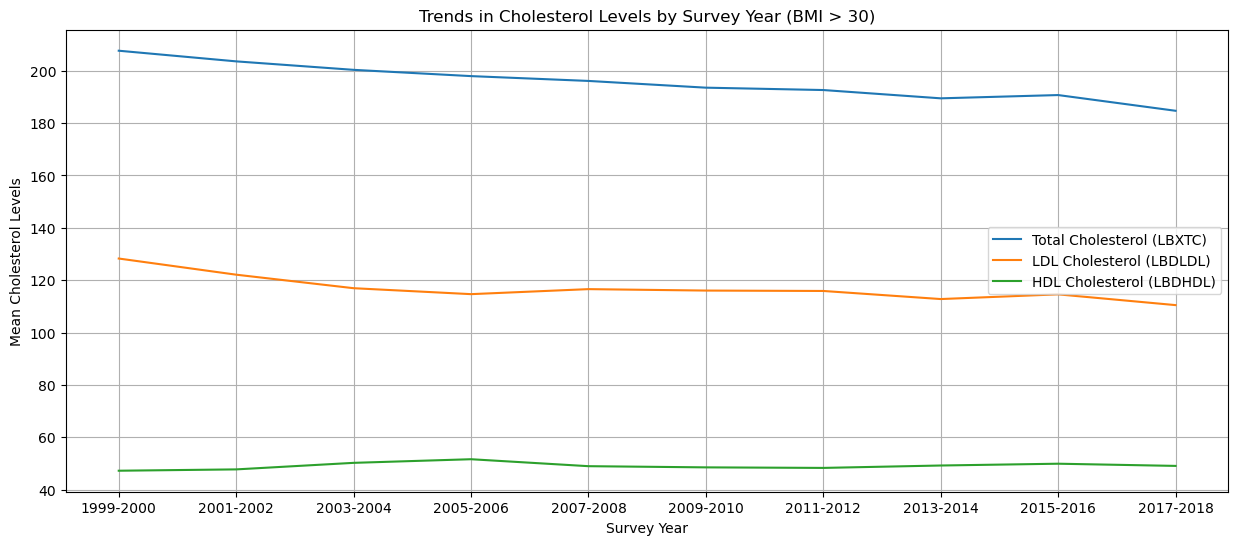

In [78]:
# filter to records corresponding to BMI > 30
bm_data = df[df["BMXBMI"]>30][["SDDSRVYR", 'LBXTC', 'LBDLDL', 'LBDHDL']]
# Grouping the data by 'SDDSRVYR' and calculating the mean of 'LBXTC', 'LBDLDL', and 'LBDHDL' for each year
mean_cholesterol_by_year = bm_data.groupby('SDDSRVYR')[['LBXTC', 'LBDLDL', 'LBDHDL']].mean()

# Plotting the trends over the years
plt.figure(figsize=(15, 6))

plt.plot(mean_cholesterol_by_year.index, mean_cholesterol_by_year['LBXTC'], label='Total Cholesterol (LBXTC)')
plt.plot(mean_cholesterol_by_year.index, mean_cholesterol_by_year['LBDLDL'], label='LDL Cholesterol (LBDLDL)')
plt.plot(mean_cholesterol_by_year.index, mean_cholesterol_by_year['LBDHDL'], label='HDL Cholesterol (LBDHDL)')

plt.xlabel('Survey Year')
plt.ylabel('Mean Cholesterol Levels')
plt.title('Trends in Cholesterol Levels by Survey Year (BMI > 30)')
plt.legend()
plt.grid(True)


## HDL

In [ ]:
# Grouping the data by 'SDDSRVYR' and calculating the mean of 'LBXTC', 'LBDLDL', and 'LBDHDL' for each year
normal_bmi_adults = df[(df["RIDAGEYR"]>20) & (df["BMXBMI"] > 18.5) & (df["BMXBMI"] <25)].groupby('SDDSRVYR')[['LBXTC', 'LBDLDL', 'LBDHDL']].mean()
overweight_bmi_adults = df[(df["RIDAGEYR"]>20) & (df["BMXBMI"] >= 25) & (df["BMXBMI"] <30)].groupby('SDDSRVYR')[['LBXTC', 'LBDLDL', 'LBDHDL']].mean()
obese_bmi_adults = df[(df["RIDAGEYR"]>20) & (df["BMXBMI"] >= 30)].groupby('SDDSRVYR')[['LBXTC', 'LBDLDL', 'LBDHDL']].mean()


# Plotting the trends over the years
plt.figure(figsize=(15, 6))
plt.plot(mean_cholesterol_by_year.index, normal_bmi_adults['LBDHDL'], label="Normal BMI")
plt.plot(mean_cholesterol_by_year.index, overweight_bmi_adults['LBDHDL'], label="Overweight BMI")
plt.plot(mean_cholesterol_by_year.index, obese_bmi_adults['LBDHDL'], label='Obese BMI')

plt.xlabel('Survey Year')
plt.ylabel('Mean Cholesterol Levels')
plt.title('Trends in HDL Cholesterol Levels by Survey Year')
plt.legend()
plt.grid(True)


In [ ]:
# HDL by 

## LDL

In [ ]:
# Grouping the data by 'SDDSRVYR' and calculating the mean of 'LBXTC', 'LBDLDL', and 'LBDHDL' for each year
normal_bmi_adults = df[(df["RIDAGEYR"]>20) & (df["BMXBMI"] > 18.5) & (df["BMXBMI"] <25)].groupby('SDDSRVYR')[['LBXTC', 'LBDLDL', 'LBDHDL']].mean()
overweight_bmi_adults = df[(df["RIDAGEYR"]>20) & (df["BMXBMI"] >= 25) & (df["BMXBMI"] <30)].groupby('SDDSRVYR')[['LBXTC', 'LBDLDL', 'LBDHDL']].mean()
obese_bmi_adults = df[(df["RIDAGEYR"]>20) & (df["BMXBMI"] >= 30)].groupby('SDDSRVYR')[['LBXTC', 'LBDLDL', 'LBDHDL']].mean()


# Plotting the trends over the years
plt.figure(figsize=(15, 6))
plt.plot(normal_bmi_adults.index, normal_bmi_adults['LBDLDL'], label="Normal BMI")
plt.plot(overweight_bmi_adults.index, overweight_bmi_adults['LBDLDL'], label="Overweight BMI")
plt.plot(obese_bmi_adults.index, obese_bmi_adults['LBDLDL'], label='Obese BMI', color = 'r')

plt.xlabel('Survey Year')
plt.ylabel('Mean LDL Cholesterol Levels')
plt.title('Trends LDL Cholesterol Levels by Survey Year')
plt.legend()
plt.grid(True)

## Total Cholestrol

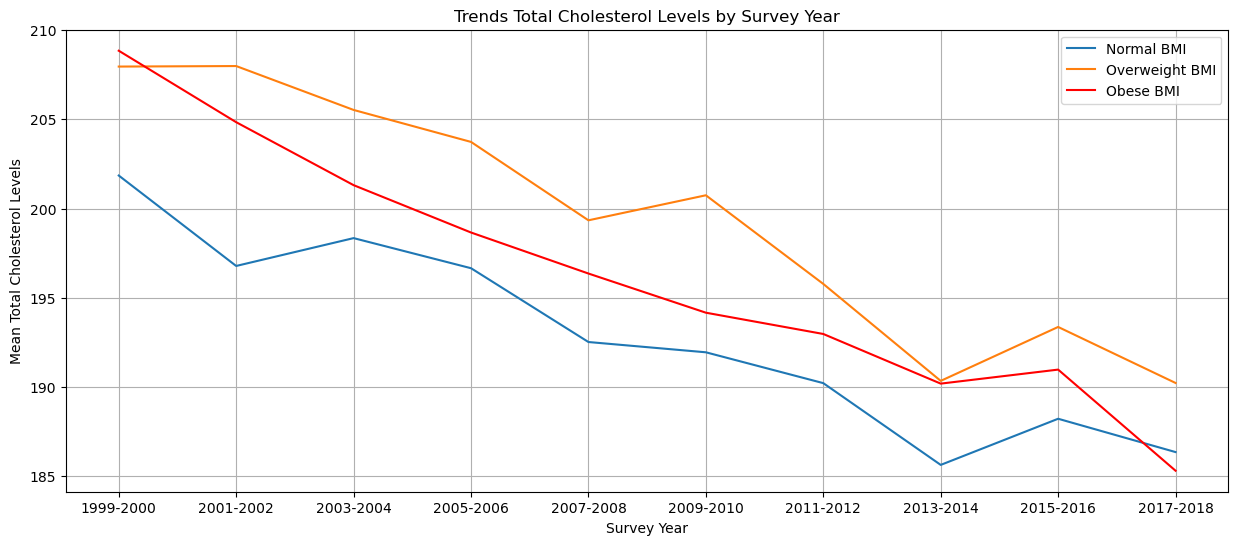

In [79]:
# Grouping the data by 'SDDSRVYR' and calculating the mean of 'LBXTC', 'LBDLDL', and 'LBDHDL' for each year
normal_bmi_adults = df[(df["RIDAGEYR"]>20) & (df["BMXBMI"] > 18.5) & (df["BMXBMI"] <25)].groupby('SDDSRVYR')[['LBXTC', 'LBDLDL', 'LBDHDL']].mean()
overweight_bmi_adults = df[(df["RIDAGEYR"]>20) & (df["BMXBMI"] >= 25) & (df["BMXBMI"] <30)].groupby('SDDSRVYR')[['LBXTC', 'LBDLDL', 'LBDHDL']].mean()
obese_bmi_adults = df[(df["RIDAGEYR"]>20) & (df["BMXBMI"] >= 30)].groupby('SDDSRVYR')[['LBXTC', 'LBDLDL', 'LBDHDL']].mean()


# Plotting the trends over the years
plt.figure(figsize=(15, 6))
plt.plot(normal_bmi_adults.index, normal_bmi_adults['LBXTC'], label="Normal BMI")
plt.plot(overweight_bmi_adults.index, overweight_bmi_adults['LBXTC'], label="Overweight BMI")
plt.plot(obese_bmi_adults.index, obese_bmi_adults['LBXTC'], label='Obese BMI', color = 'r')

plt.xlabel('Survey Year')
plt.ylabel('Mean Total Cholesterol Levels')
plt.title('Trends Total Cholesterol Levels by Survey Year')
plt.legend()
plt.grid(True)

## Conclusion

#### Obesity is multifacted impact on cholestrol partriculary HDL, lDL, and total cholestrol. Obesity lowers HDL while rasing LDL and total cholestrol there for increasing cardio vascular disease. Obesity also impacts the relationship between racial and ethnic groups. African Americans have the highest obesity rates while mixed races have the lowest. Mexican, White, Hispanics are above over weight as well. There are alot of factors such as genetics, lifestyle, and social economic influences that contribute to obesity. Manging obesity requires lifestyle modifications, dietary improvements and regular physical excercise. All races and ethnic groups are in epidemic proportions and should consider combating obesity as it pervasive in our nation and the world. 